# Estimación del precio de una vivienda 



In [12]:
# cargamos librerías necesarias
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

import warnings
warnings.filterwarnings('ignore')

In [14]:
!pip install feature.engine

# 1. Cargar datos

In [68]:
airbnb = pd.read_csv('./data/airbnb-listings.csv', sep= ';', decimal='.')
#airbnb.head() # visualizamos 5 primeras filas
pd.options.display.max_columns = None #Para poder ver todas la columnas ya que trasponiendo son 89 colunas y me continua poniendo puntos suspensivos
airbnb.head()                    

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,Notes,Transit,Access,Interaction,House Rules,Thumbnail Url,Medium Url,Picture Url,XL Picture Url,Host ID,Host URL,Host Name,Host Since,Host Location,Host About,Host Response Time,Host Response Rate,Host Acceptance Rate,Host Thumbnail Url,Host Picture Url,Host Neighbourhood,Host Listings Count,Host Total Listings Count,Host Verifications,Street,Neighbourhood,Neighbourhood Cleansed,Neighbourhood Group Cleansed,City,State,Zipcode,Market,Smart Location,Country Code,Country,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Square Feet,Price,Weekly Price,Monthly Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Calendar Updated,Has Availability,Availability 30,Availability 60,Availability 90,Availability 365,Calendar last Scraped,Number of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,15141125,https://www.airbnb.com/rooms/15141125,20170407214119,2017-04-08,Panoramic charming studio!,"Charming bright and cosy studio in ""El Rastro""...",It's a bright and cosy studio located in the h...,"Charming bright and cosy studio in ""El Rastro""...",none,The studio is located in the remarkable neighb...,NaN,The closest metro is La latina which will take...,The full studio will be entirely to the guests...,I am delighted to preform the check in at the ...,NaN,https://a0.muscache.com/im/pictures/d1a2212d-c...,https://a0.muscache.com/im/pictures/d1a2212d-c...,https://public.opendatasoft.com/api/explore/v2...,https://a0.muscache.com/im/pictures/d1a2212d-c...,96019257,https://www.airbnb.com/users/show/96019257,Marina,2016-09-20,"Madrid, Community of Madrid, Spain",I have a serious addiction for traveling :0l! ...,within an hour,100.0,NaN,https://a0.muscache.com/im/pictures/fffbb86e-5...,https://a0.muscache.com/im/pictures/fffbb86e-5...,NaN,2.0,2.0,"email,phone,facebook,reviews,jumio,government_id","Madrid, Comunidad de Madrid 28005, Spain",NaN,Embajadores,Centro,Madrid,Comunidad de Madrid,28005,Madrid,"Madrid, Spain",ES,Spain,40.407453,-3.707995,Loft,Entire home/apt,2,1.0,0.0,1.0,Real Bed,"TV,Internet,Wireless Internet,Kitchen,Pets all...",NaN,50.0,NaN,NaN,100.0,20.0,2,15,2,1125,today,NaN,13,24,42,66,2017-04-07,30,2016-10-15,2017-03-31,96.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,NaN,moderate,2.0,5.11,"40.40745268477803, -3.7079954754432634","Host Is Superhost,Host Has Profile Pic,Host Id..."
1,9470166,https://www.airbnb.com/rooms/9470166,20170407214119,2017-04-08,Comfortable penthouse in the center,"In the center, recently remodeled, comfortable...",Quiet and comfortable space where you can rela...,"In the center, recently remodeled, comfortable...",none,It belongs to the district center of Madrid wh...,A la misma distancia en tiempo podrás acceder ...,"The nearest Metro station is Tirso de Molina ,...","You will be alone, while you are in my flat an...",If you have any questions while you are in the...,Check ins after 21h to 22h have an extra cost ...,https://a0.muscache.com/im/pictures/3eb59287-8...,https://a0.muscache.com/im/pictures/3eb59287-8...,https://public.opendatasoft.com/api/explore/v2...,https://a0.muscache.com/im/pictures/3eb59287-8...,9885245,https://www.airbnb.com/users/show/9885245,Jorge,2013-11-08,"Madrid, Community of Madrid, Spain",NaN,within an hour,100.0,NaN,https://a0.muscache.com/im/users/9885245/profi...,https://a0.muscache.com/im/users/9885245/profi...,Hortaleza,13.0,13.0,"email,phone,reviews,jumio","Madrid, Comunidad de Madrid 28012, Spain",NaN,Embajadores,Centro,Madrid,Comunidad de Madrid,28012,Madrid,"Madrid, Spain",ES,Spain,40.408316,-3.705006,Apartment,Entire

In [32]:
airbnb.dtypes

ID                                  int64
Listing Url                        object
Scrape ID                           int64
Last Scraped                       object
Name                               object
                                   ...   
Cancellation Policy                object
Calculated host listings count    float64
Reviews per Month                 float64
Geolocation                        object
Features                           object
Length: 89, dtype: object

dividimos entre train y test y nos guardamos los datos en ficheros diferentes


In [38]:
train, test = train_test_split(airbnb_extract, test_size=0.25, shuffle=True, random_state=0)

print(f'training: {train.shape}')
print(f'test: {test.shape}')

train.to_csv('./data/train.csv', sep=';', decimal='.', index=False)
test.to_csv('./data/test.csv', sep=';', decimal='.', index=False)

training: (11085, 89)
test: (3695, 89)


In [85]:
airbnb_train = pd.read_csv('./data/train.csv', sep= ';', decimal='.')
airbnb_train.head(2)

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,Notes,Transit,Access,Interaction,House Rules,Thumbnail Url,Medium Url,Picture Url,XL Picture Url,Host ID,Host URL,Host Name,Host Since,Host Location,Host About,Host Response Time,Host Response Rate,Host Acceptance Rate,Host Thumbnail Url,Host Picture Url,Host Neighbourhood,Host Listings Count,Host Total Listings Count,Host Verifications,Street,Neighbourhood,Neighbourhood Cleansed,Neighbourhood Group Cleansed,City,State,Zipcode,Market,Smart Location,Country Code,Country,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Square Feet,Price,Weekly Price,Monthly Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Calendar Updated,Has Availability,Availability 30,Availability 60,Availability 90,Availability 365,Calendar last Scraped,Number of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,215377,https://www.airbnb.com/rooms/215377,20170407214119,2017-04-08,Precioso Apartamento en el centro,Precioso apartamento en una de las mejores zon...,Fantástico apartamento situado en el centro de...,Precioso apartamento en una de las mejores zon...,none,NaN,NaN,NaN,NaN,NaN,Que se cuide como si fuese la propia.,NaN,NaN,https://public.opendatasoft.com/api/explore/v2...,NaN,1111901,https://www.airbnb.com/users/show/1111901,Carmen,2011-09-05,spain,Hola a todos y a todas!! Espero que disfrutéis...,within a day,100.0,NaN,https://a0.muscache.com/im/users/1111901/profi...,https://a0.muscache.com/im/users/1111901/profi...,Centro,1.0,1.0,"email,phone,reviews","Centro, Madrid, Comunidad de Madrid, Spain",Centro,Cortes,Centro,Madrid,Comunidad de Madrid,NaN,Madrid,"Madrid, Spain",ES,Spain,40.412672,-3.699217,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"TV,Internet,Wireless Internet,Air conditioning...",NaN,70.0,450.0,1350.0,100.0,30.0,1,0,2,1125,3 weeks ago,NaN,29,59,89,179,2017-04-08,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,strict,1.0,NaN,"40.412672280122216, -3.6992168888748926","Host Has Profile Pic,Requires License"
1,17074266,https://www.airbnb.com/rooms/17074266,20170407214119,2017-04-08,Precioso apartamento exterior en Atocha,"Alojamiento bueno para parejas, aventureros, y...",El apartamento es exterior y con bastante luz....,"Alojamiento bueno para parejas, aventureros, y...",none,Es un barrio tranquilo y tiene la estación de ...,Supermercado a 2 minutos caminando.,Es una zona de fácil aparcamiento y tiene dos ...,Todo el apartamento está disponible para ti. C...,"En el caso de necesitar mi ayuda, estoy dispon...",NaN,https://a0.muscache.com/im/pictures/29ab574c-4...,https://a0.muscache.com/im/pictures/29ab574c-4...,https://public.opendatasoft.com/api/explore/v2...,https://a0.muscache.com/im/pictures/29ab574c-4...,114439291,https://www.airbnb.com/users/show/114439291,Javier,2017-02-02,"Madrid, Community of Madrid, Spain",NaN,within a few hours,100.0,NaN,https://a0.muscache.com/im/pictures/07bd23d3-3...,https://a0.muscache.com/im/pictures/07bd23d3-3...,Palos do Moguer,1.0,1.0,"email,phone,reviews,work_email","Palos do Moguer, Madrid, Comunidad de Madrid 2...",Palos do Moguer,Palos de Moguer,Arganzuela,Madrid,Comunidad de Madrid,28012,Madrid,"Madrid, Spain",ES,Spain,40.403869,-3.698641,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"Wireless Internet,Air conditioning,Kitchen,Bre...",NaN,55.0,NaN,NaN,NaN,15.0,2,15,2,1125,a week ago,NaN,1,1,6,7,2017-04-07,6,2017-02-10,2017-03-26,93.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,NaN,moderate,1.0,3.1,"40.40386893572995, -3.6986410064048783","Host Has Profile Pic,Is Location Exact,Require..."


Elimino las columnas que no me sirven para realizar el estudio (url, comentarios, datos del host...) 

In [86]:

airbnb_train_cl = airbnb_train.drop(['Zipcode','ID','Listing Url','Scrape ID','Last Scraped','Name', 'Summary','Space','Description','Experiences Offered','Neighborhood Overview','Notes','Transit','Access' ,'Interaction', 'House Rules' ,'Thumbnail Url', 'Medium Url','Picture Url','XL Picture Url','Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location', 'Host About','Host Response Time','Host Response Rate','Host Acceptance Rate','Host Thumbnail Url','Host Picture Url', 'Host Neighbourhood','Host Listings Count','Host Total Listings Count','Host Verifications','Street','Neighbourhood','Neighbourhood Group Cleansed','State','Market','Smart Location','Country Code','Country','Latitude','Longitude','Amenities', 'Security Deposit','Cleaning Fee','Extra People','Minimum Nights','Maximum Nights','Calendar Updated','Has Availability','Availability 30','Availability 60','Availability 90','Availability 365','Calendar last Scraped', 'First Review','Last Review','Review Scores Accuracy','Review Scores Cleanliness','Review Scores Checkin','Weekly Price', 'Monthly Price','Review Scores Communication','Review Scores Location','Review Scores Value','License','Jurisdiction Names','Calculated host listings count','Reviews per Month','Geolocation','Features' ], axis=1)
airbnb_train_cl

,Neighbourhood Cleansed,City,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Square Feet,Price,Guests Included,Number of Reviews,Review Scores Rating,Cancellation Policy
0,Cortes,Madrid,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,NaN,70.0,1,0,NaN,strict
1,Palos de Moguer,Madrid,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,NaN,55.0,2,6,93.0,moderate
2,Argüelles,Madrid,Apartment,Entire home/apt,6,1.0,2.0,3.0,Real Bed,NaN,70.0,2,6,93.0,strict
3,Justicia,Madrid,Apartment,Entire home/apt,4,2.5,1.0,2.0,Real Bed,NaN,120.0,2,3,80.0,strict
4,Ibiza,Madrid,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,NaN,93.0,2,10,90.0,strict
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11080,El Viso,Madrid,Apartment,Entire home/apt,5,2.0,2.0,3.0,Real Bed,NaN,89.0,4,13,92.0,strict
11081,Palos de Moguer,Madrid,Condominium,Private room,1,1.5,1.0,1.0,Real Bed,NaN,22.0,1,0,NaN,flexible
11082,Embajadores,Madrid,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,NaN,70.0,1,4,100.0,strict
11083,Universidad,Madrid,Apartment,Shared room,8,2.5,1.0,6.0,Real Bed,NaN,328.0,1,0,NaN,flexible


In [87]:
airbnb_train_cl.describe()

,Accommodates,Bathrooms,Bedrooms,Beds,Square Feet,Price,Guests Included,Number of Reviews,Review Scores Rating
count,11085.000000,11046.000000,11065.000000,11049.000000,436.000000,11071.000000,11085.000000,11085.000000,8582.000000
mean,3.268381,1.280147,1.339449,2.039008,366.477064,73.383434,1.576545,22.853676,91.648217
std,2.092686,0.656122,0.891889,1.610581,661.436157,72.025848,1.137922,38.775030,9.061657
min,1.000000,0.000000,0.000000,1.000000,0.000000,9.000000,1.000000,0.000000,20.000000
25%,2.000000,1.000000,1.000000,1.000000,0.000000,33.000000,1.000000,1.000000,89.000000
50%,3.000000,1.000000,1.000000,2.000000,70.000000,55.000000,1.000000,7.000000,94.000000
75%,4.000000,1.000000,2.000000,2.000000,538.000000,85.000000,2.000000,27.000000,98.000000
max,16.000000,8.000000,10.000000,16.000000,6997.000000,999.000000,16.000000,446.000000,100.000000


In [88]:
airbnb_train_cl.isnull().any()

Neighbourhood Cleansed    False
City                       True
Property Type             False
Room Type                 False
Accommodates              False
Bathrooms                  True
Bedrooms                   True
Beds                       True
Bed Type                  False
Square Feet                True
Price                      True
Guests Included           False
Number of Reviews         False
Review Scores Rating       True
Cancellation Policy       False
dtype: bool

In [89]:
airbnb_No_Madrid = airbnb_train_cl.loc[airbnb_train_cl['City']!='Madrid']
airbnb_No_Madrid
#voy a eliminar de mi dataset todos los que no sean de Madrid
airbnb_train_cl = airbnb_train_cl.loc[airbnb_train_cl['City']=='Madrid']
airbnb_train_cl
#airbnb_No_Madrid = airbnb_train_cl.loc[airbnb_train_cl['City']!='Madrid']
#airbnb_No_Madrid (simplemente para comprobar que el daset es correcto solo contiene a Madrid)
#ahora ya puedo eliminar la columna City
airbnb_train_cl = airbnb_train_cl.drop(['City'], axis=1)

In [90]:

airbnb_train_cl

,Neighbourhood Cleansed,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Square Feet,Price,Guests Included,Number of Reviews,Review Scores Rating,Cancellation Policy
0,Cortes,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,NaN,70.0,1,0,NaN,strict
1,Palos de Moguer,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,NaN,55.0,2,6,93.0,moderate
2,Argüelles,Apartment,Entire home/apt,6,1.0,2.0,3.0,Real Bed,NaN,70.0,2,6,93.0,strict
3,Justicia,Apartment,Entire home/apt,4,2.5,1.0,2.0,Real Bed,NaN,120.0,2,3,80.0,strict
4,Ibiza,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,NaN,93.0,2,10,90.0,strict
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11080,El Viso,Apartment,Entire home/apt,5,2.0,2.0,3.0,Real Bed,NaN,89.0,4,13,92.0,strict
11081,Palos de Moguer,Condominium,Private room,1,1.5,1.0,1.0,Real Bed,NaN,22.0,1,0,NaN,flexible
11082,Embajadores,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,NaN,70.0,1,4,100.0,strict
11083,Universidad,Apartment,Shared room,8,2.5,1.0,6.0,Real Bed,NaN,328.0,1,0,NaN,flexible


In [91]:
airbnb_train_cl.isnull().any()

Neighbourhood Cleansed    False
Property Type             False
Room Type                 False
Accommodates              False
Bathrooms                  True
Bedrooms                   True
Beds                       True
Bed Type                  False
Square Feet                True
Price                      True
Guests Included           False
Number of Reviews         False
Review Scores Rating       True
Cancellation Policy       False
dtype: bool

In [157]:
#Vamos a ver el numero de null que hay en las columnas anteriores porque si hay muchos nulls no podremos utilizarlo en nuestro ejerccio
# en este punto he revisado mis columnas anteriores ya que habia seleecionado el dato de Neighbourhood 
#pero me parece mas correcto tener Neighbourhood Cleansed ya que en esta columna no hay nulos 
print(f'Neighbourhood: ', airbnb_train_cl['Neighbourhood Cleansed'].isnull().sum())
print(f'Bathrooms: ', airbnb_train_cl['Bathrooms'].isnull().sum())
print(f'Bedrooms: ', airbnb_train_cl['Bedrooms'].isnull().sum())
print(f'Beds: ', airbnb_train_cl['Beds'].isnull().sum())
print(f'Square Feet: ', airbnb_train_cl['Square Feet'].isnull().sum())
print(f'Review Scores Rating : ', airbnb_train_cl['Review Scores Rating'].isnull().sum())

print(f'porcentaje de nulos en Neighbourhood:',(airbnb_train_cl.shape[0]- airbnb_train_cl['Neighbourhood Cleansed'].isnull().sum())/airbnb_train_cl.shape[0])
print(f'porcentaje de nulos en Square Feet:', (airbnb_train_cl.shape[0]-airbnb_train_cl['Square Feet'].isnull().sum())/airbnb_train_cl.shape[0])
print(f'porcentaje de nulos en Review Scores Rating:',(airbnb_train_cl.shape[0]- airbnb_train_cl['Review Scores Rating'].isnull().sum())/airbnb_train_cl.shape[0])

#Vemos que el porcentaje de nulos en Square Feet es elevadisimo 
#por lo tanto no vamos a poder utilizarlo para el ejercicio ya que seria un dato muy poco fiable 
airbnb_train_cl = airbnb_train_cl.drop(['Square Feet'], axis=1)
airbnb_train_cl

Neighbourhood:  0
Bathrooms:  33
Bedrooms:  19
Beds:  35
Review Scores Rating :  2154
porcentaje de nulos en Neighbourhood: 1.0
porcentaje de nulos en Review Scores Rating: 0.7827753126260589


,Neighbourhood Cleansed,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Price,Guests Included,Number of Reviews,Review Scores Rating,Cancellation Policy
0,81.939551,67.402664,86.942392,4,1.0,1.0,1.0,65.876446,70.0,1,0,NaN,75.680610
1,51.181347,67.402664,86.942392,4,1.0,1.0,1.0,65.876446,55.0,2,6,93.0,62.120219
2,65.000000,67.402664,86.942392,6,1.0,2.0,3.0,65.876446,70.0,2,6,93.0,75.680610
3,78.352137,67.402664,86.942392,4,2.5,1.0,2.0,65.876446,120.0,2,3,80.0,75.680610
4,72.372093,67.402664,86.942392,4,1.0,1.0,2.0,65.876446,93.0,2,10,90.0,75.680610
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11080,55.371429,67.402664,86.942392,5,2.0,2.0,3.0,65.876446,89.0,4,13,92.0,75.680610
11081,51.181347,58.890196,34.329278,1,1.5,1.0,1.0,65.876446,22.0,1,0,NaN,56.712983
11082,60.365698,67.402664,86.942392,2,1.0,1.0,1.0,65.876446,70.0,1,4,100.0,75.680610
11083,66.655307,67.402664,32.066225,8,2.5,1.0,6.0,65.876446,328.0,1,0,NaN,56.712983


In [98]:
airbnb_train_cl.head()

,Neighbourhood Cleansed,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Price,Guests Included,Number of Reviews,Review Scores Rating,Cancellation Policy
0,Cortes,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,70.0,1,0,NaN,strict
1,Palos de Moguer,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,55.0,2,6,93.0,moderate
2,Argüelles,Apartment,Entire home/apt,6,1.0,2.0,3.0,Real Bed,70.0,2,6,93.0,strict
3,Justicia,Apartment,Entire home/apt,4,2.5,1.0,2.0,Real Bed,120.0,2,3,80.0,strict
4,Ibiza,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,93.0,2,10,90.0,strict


In [111]:
#Vamos a ver cuantos de nuestros pisos en train no tienen precio que es la varible a calcular
print(f'Price : ', airbnb_train_cl['Price'].isnull().sum())
price_null=airbnb_train_cl.loc[airbnb_train_cl['Price'].isnull()==True]
price_null.shape
airbnb_train_cl=airbnb_train_cl.loc[airbnb_train_cl['Price'].isnull()==False]
airbnb_train_cl

Price :  0


,Neighbourhood Cleansed,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Price,Guests Included,Number of Reviews,Review Scores Rating,Cancellation Policy
0,Cortes,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,70.0,1,0,NaN,strict
1,Palos de Moguer,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,55.0,2,6,93.0,moderate
2,Argüelles,Apartment,Entire home/apt,6,1.0,2.0,3.0,Real Bed,70.0,2,6,93.0,strict
3,Justicia,Apartment,Entire home/apt,4,2.5,1.0,2.0,Real Bed,120.0,2,3,80.0,strict
4,Ibiza,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,93.0,2,10,90.0,strict
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11080,El Viso,Apartment,Entire home/apt,5,2.0,2.0,3.0,Real Bed,89.0,4,13,92.0,strict
11081,Palos de Moguer,Condominium,Private room,1,1.5,1.0,1.0,Real Bed,22.0,1,0,NaN,flexible
11082,Embajadores,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,70.0,1,4,100.0,strict
11083,Universidad,Apartment,Shared room,8,2.5,1.0,6.0,Real Bed,328.0,1,0,NaN,flexible


In [114]:
airbnb_train_cl.isnull().any()

Neighbourhood Cleansed    False
Property Type             False
Room Type                 False
Accommodates              False
Bathrooms                  True
Bedrooms                   True
Beds                       True
Bed Type                  False
Price                     False
Guests Included           False
Number of Reviews         False
Review Scores Rating       True
Cancellation Policy       False
dtype: bool

In [118]:

airbnb_train_cl.dtypes
#Tenemos 5 variables categoricas : Neighbourhood Cleansed,Property Type,Room Type,Bed Type,Cancellation Policy
#Con la ayuda de la teoria del curso vamos a categorizar las variables
""""
categorical = ['cat1', 'cat2', 'cat3']

mean_map = {}
for c in categorical:
    mean = data.groupby(c)['target'].mean()
    data[c] = data[c].map(mean)    
    mean_map[c] = mean

# Si hubiera test, luego se haría:
#for c in categorical:
#    data_test[c] = data_test[c].map(mean_map[c])

data.head()
"""
categorical = ['Neighbourhood Cleansed', 'Property Type', 'Room Type','Bed Type','Cancellation Policy']
mean_map = {}
for c in categorical:
    mean = airbnb_train_cl.groupby(c)['Price'].mean()
    airbnb_train_cl[c] = airbnb_train_cl[c].map(mean)    
    mean_map[c] = mean
    
airbnb_train_cl

,Neighbourhood Cleansed,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Price,Guests Included,Number of Reviews,Review Scores Rating,Cancellation Policy
0,81.939551,67.402664,86.942392,4,1.0,1.0,1.0,65.876446,70.0,1,0,NaN,75.680610
1,51.181347,67.402664,86.942392,4,1.0,1.0,1.0,65.876446,55.0,2,6,93.0,62.120219
2,65.000000,67.402664,86.942392,6,1.0,2.0,3.0,65.876446,70.0,2,6,93.0,75.680610
3,78.352137,67.402664,86.942392,4,2.5,1.0,2.0,65.876446,120.0,2,3,80.0,75.680610
4,72.372093,67.402664,86.942392,4,1.0,1.0,2.0,65.876446,93.0,2,10,90.0,75.680610
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11080,55.371429,67.402664,86.942392,5,2.0,2.0,3.0,65.876446,89.0,4,13,92.0,75.680610
11081,51.181347,58.890196,34.329278,1,1.5,1.0,1.0,65.876446,22.0,1,0,NaN,56.712983
11082,60.365698,67.402664,86.942392,2,1.0,1.0,1.0,65.876446,70.0,1,4,100.0,75.680610
11083,66.655307,67.402664,32.066225,8,2.5,1.0,6.0,65.876446,328.0,1,0,NaN,56.712983


In [119]:
airbnb_train_cl.dtypes

Neighbourhood Cleansed    float64
Property Type             float64
Room Type                 float64
Accommodates                int64
Bathrooms                 float64
Bedrooms                  float64
Beds                      float64
Bed Type                  float64
Price                     float64
Guests Included             int64
Number of Reviews           int64
Review Scores Rating      float64
Cancellation Policy       float64
dtype: object

Antes seguir con nuestro análisis, vamos a transformar las variables de superficie para expresarlas en $m^2$. Posteriormente, renombraremos las columnas.

In [120]:
#vamos a quedarnos con estas columnas
airbnb_train_cl.columns

Index(['Neighbourhood Cleansed', 'Property Type', 'Room Type', 'Accommodates',
       'Bathrooms', 'Bedrooms', 'Beds', 'Bed Type', 'Price', 'Guests Included',
       'Number of Reviews', 'Review Scores Rating', 'Cancellation Policy'],
      dtype='object')

In [121]:
airbnb_train_cl.head().T

,0,1,2,3,4
Neighbourhood Cleansed,81.939551,51.181347,65.000000,78.352137,72.372093
Property Type,67.402664,67.402664,67.402664,67.402664,67.402664
Room Type,86.942392,86.942392,86.942392,86.942392,86.942392
Accommodates,4.000000,4.000000,6.000000,4.000000,4.000000
Bathrooms,1.000000,1.000000,1.000000,2.500000,1.000000
Bedrooms,1.000000,1.000000,2.000000,1.000000,1.000000
Beds,1.000000,1.000000,3.000000,2.000000,2.000000
Bed Type,65.876446,65.876446,65.876446,65.876446,65.876446
Price,70.000000,55.000000,70.000000,120.000000,93.000000
Guests Included,1.000000,2.000000,2.000000,2.000000,2.000000


In [153]:
prueba=airbnb_train_cl.dropna()
prueba.shape
print(f'porcentaje de nulos en Review Scores Rating:', airbnb_train_cl['Review Scores Rating'].isnull().sum()/airbnb_train_cl.shape[0])
nulos=airbnb_train_cl['Review Scores Rating'].isnull().sum()
#p=airbnb_train_cl.groupby('Neighbourhood Cleansed'&'Price'&'Bedrooms')['Review Scores Rating'].mean()
p=airbnb_train_cl. groupby (['Neighbourhood Cleansed', 'Price'])
b=p['Review Scores Rating'].mean()

prueba.shape
f=((prueba.shape[0]-airbnb_train_cl.shape[0])/airbnb_train_cl.shape[0])*100
f
#Si quito todos los null de dataset estoy eliminando muchas filas del mismo... por lo que no voy a rellenar los valores a null 

porcentaje de nulos en Review Scores Rating: 0.2172246873739411


-22.105687777329567

## Imputación

Voy a imputar los datos a null de Review Scores Rating con la media

In [185]:
airbnb_train_cl["Review Scores Rating"].fillna(airbnb_train_cl["Review Scores Rating"].mean(), inplace=True)
airbnb_train_cl.isnull().any()

Neighbourhood Cleansed    False
Property Type             False
Room Type                 False
Accommodates              False
Bathrooms                 False
Bedrooms                  False
Beds                      False
Bed Type                  False
Price                     False
Guests Included           False
Number of Reviews         False
Review Scores Rating      False
Cancellation Policy       False
dtype: bool

In [186]:
prueba=airbnb_train_cl.dropna()
f=((prueba.shape[0]-airbnb_train_cl.shape[0])/airbnb_train_cl.shape[0])*100
#si para el resto de varibles quito los null solo pierdo el 0.625 de los datos por lo tanto voy a tomar la decision de trabajar sin ellos.
airbnb_train_cl=airbnb_train_cl.dropna()
airbnb_train_cl


,Neighbourhood Cleansed,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Price,Guests Included,Number of Reviews,Review Scores Rating,Cancellation Policy
0,81.939551,67.402664,86.942392,4,1.0,1.0,1.0,65.876446,70.0,1,0,100.0,75.680610
1,51.181347,67.402664,86.942392,4,1.0,1.0,1.0,65.876446,55.0,2,6,93.0,62.120219
2,65.000000,67.402664,86.942392,6,1.0,2.0,3.0,65.876446,70.0,2,6,93.0,75.680610
3,78.352137,67.402664,86.942392,4,2.5,1.0,2.0,65.876446,120.0,2,3,80.0,75.680610
4,72.372093,67.402664,86.942392,4,1.0,1.0,2.0,65.876446,93.0,2,10,90.0,75.680610
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11080,55.371429,67.402664,86.942392,5,2.0,2.0,3.0,65.876446,89.0,4,13,92.0,75.680610
11081,51.181347,58.890196,34.329278,1,1.5,1.0,1.0,65.876446,22.0,1,0,100.0,56.712983
11082,60.365698,67.402664,86.942392,2,1.0,1.0,1.0,65.876446,70.0,1,4,100.0,75.680610
11083,66.655307,67.402664,32.066225,8,2.5,1.0,6.0,65.876446,328.0,1,0,100.0,56.712983


## 2. Análisis exploratorio



In [187]:
airbnb_train_cl.describe().T

,count,mean,std,min,25%,50%,75%,max
Neighbourhood Cleansed,9854.0,65.645303,19.557244,17.000000,54.714286,66.655307,78.352137,280.000000
Property Type,9854.0,65.614319,6.235472,15.000000,67.402664,67.402664,67.402664,220.000000
Room Type,9854.0,65.689935,25.854142,32.066225,34.329278,86.942392,86.942392,86.942392
Accommodates,9854.0,3.183174,1.991058,1.000000,2.000000,2.000000,4.000000,16.000000
Bathrooms,9854.0,1.250203,0.590090,0.000000,1.000000,1.000000,1.000000,8.000000
Bedrooms,9854.0,1.290643,0.818913,0.000000,1.000000,1.000000,2.000000,10.000000
Beds,9854.0,1.981835,1.511475,1.000000,1.000000,1.000000,2.000000,16.000000
Bed Type,9854.0,65.609366,1.853716,43.214286,65.876446,65.876446,65.876446,65.876446
Price,9854.0,65.644713,55.553295,9.000000,30.000000,52.000000,80.000000,875.000000
Guests Included,9854.0,1.567587,1.056531,1.000000,1.000000,1.000000,2.000000,14.000000


A pesar de este resumen, conviene siempre hacer representaciones gráficas, que nos ofrecen, en general un mejor entendimiento de los datos. Para ello vamos representar los histogramas de algunos atributos: *bedrooms*, *sqm_living* y *yr_built*

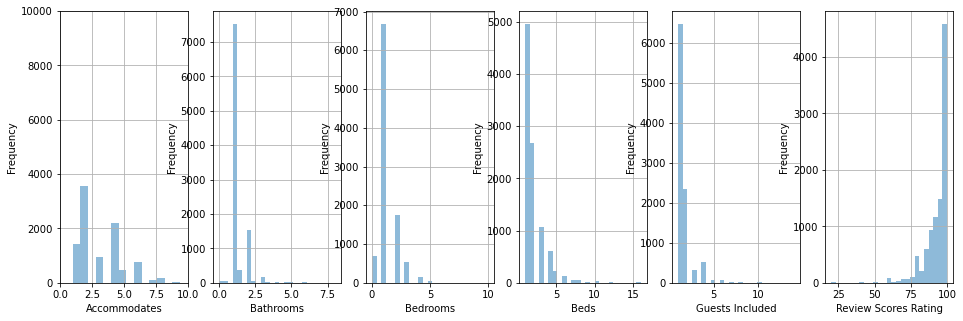

In [198]:
plt.figure(figsize=(16, 5))

plt.subplot(1,6,1)
airbnb_train_cl['Accommodates'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.axis([0, 10, 0, 10000])
plt.xlabel('Accommodates')

plt.subplot(1,6,2)
airbnb_train_cl['Bathrooms'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Bathrooms')

plt.subplot(1,6,3)
airbnb_train_cl['Bedrooms'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Bedrooms')

plt.subplot(1,6,4)
airbnb_train_cl['Beds'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Beds')

plt.subplot(1,6,5)
airbnb_train_cl['Guests Included'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Guests Included')

plt.subplot(1,6,6)
airbnb_train_cl['Review Scores Rating'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Review Scores Rating')

plt.show()


Vamos a comparar la variable objetivo con el resto de variables, de esta forma veremos los outlier

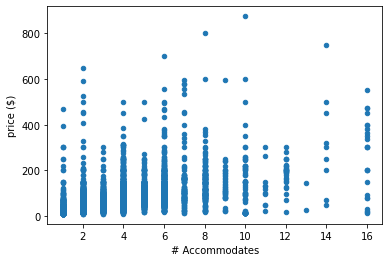

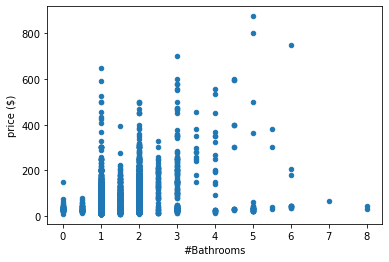

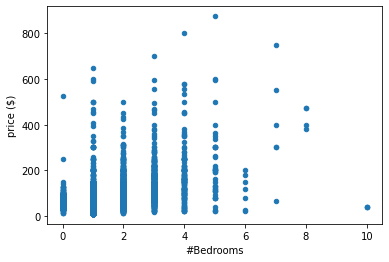

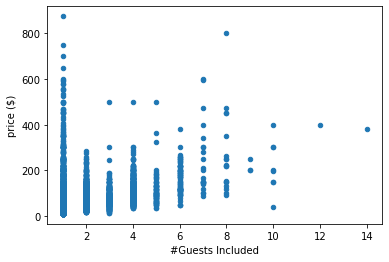

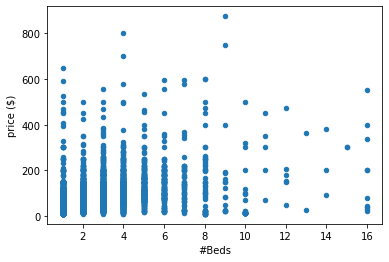

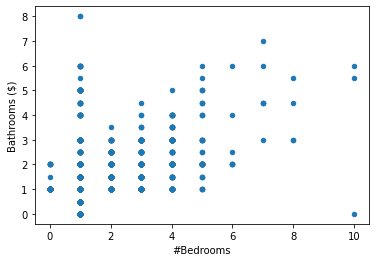

In [238]:


airbnb_train_cl.plot(kind = 'scatter',x='Accommodates',y = 'Price')
plt.xlabel('# Accommodates')
plt.ylabel('price ($)')
plt.show()

airbnb_train_cl.plot(kind = 'scatter',x='Bathrooms',y = 'Price')
plt.xlabel('#Bathrooms')
plt.ylabel('price ($)')
plt.show()

airbnb_train_cl.plot(kind = 'scatter',x='Bedrooms',y = 'Price')
plt.xlabel('#Bedrooms')
plt.ylabel('price ($)')
plt.show()

airbnb_train_cl.plot(kind = 'scatter',x='Guests Included',y = 'Price')
plt.xlabel('#Guests Included')
plt.ylabel('price ($)')
plt.show()

airbnb_train_cl.plot(kind = 'scatter',x='Beds',y = 'Price')
plt.xlabel('#Beds')
plt.ylabel('price ($)')
plt.show()

airbnb_train_cl.plot(kind = 'scatter',x='Bedrooms',y = 'Bathrooms')
plt.xlabel('#Bedrooms')
plt.ylabel('Bathrooms')
plt.show()

tras los graficos podemos ver dos outliers que creo son bastante claros en Bathrooms y Bedrooms

In [263]:
airbnb_train_cl['Bedrooms'].value_counts()


1.0     6680
2.0     1739
0.0      690
3.0      529
4.0      153
5.0       43
6.0        7
7.0        6
8.0        4
10.0       3
Name: Bedrooms, dtype: int64

In [206]:
airbnb_train_cl['Bathrooms'].value_counts()

1.0    7528
2.0    1526
1.5     358
3.0     174
2.5      66
0.0      50
0.5      48
5.0      32
4.0      26
4.5      16
6.0      12
3.5      11
5.5       4
8.0       2
7.0       1
Name: Bathrooms, dtype: int64

In [272]:
filtro = airbnb_train_cl[(airbnb_train_cl['Bedrooms'] >9 ) &( airbnb_train_cl['Bathrooms'] <2)]
filtro2 = airbnb_train_cl[(airbnb_train_cl['Bedrooms'] <2 ) &( airbnb_train_cl['Bathrooms'] >7)]
#Considero outliers estos valor ya que el primer filtro es de 10 habitaciones y 0 baños
# y el segundo filtro son 1 habitacion y 8 baños 
#en ambos casos podemos pensar que son errores en los datos
filtro


,Neighbourhood Cleansed,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Price,Guests Included,Number of Reviews,Review Scores Rating,Cancellation Policy
1531,65.0,58.404372,86.942392,2,0.0,10.0,2.0,65.876446,39.0,1,0,100.0,56.712983


In [279]:

airbnb_train_cl_filtered = airbnb_train_cl.drop(filtro.index)

In [275]:
airbnb_train_cl_filtered['Bedrooms'].value_counts()

1.0     6680
2.0     1739
0.0      690
3.0      529
4.0      153
5.0       43
6.0        7
7.0        6
8.0        4
10.0       2
Name: Bedrooms, dtype: int64

In [280]:
airbnb_train_cl_filtered = airbnb_train_cl_filtered.drop(filtro2.index)

In [281]:
airbnb_train_cl_filtered['Bathrooms'].value_counts()

1.0    7528
2.0    1526
1.5     358
3.0     174
2.5      66
0.0      49
0.5      48
5.0      32
4.0      26
4.5      16
6.0      12
3.5      11
5.5       4
7.0       1
Name: Bathrooms, dtype: int64

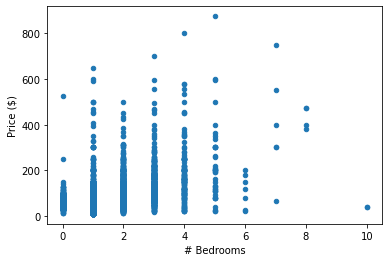

In [282]:
airbnb_train_cl_filtered.plot(kind = 'scatter',x='Bedrooms',y = 'Price')
plt.xlabel('# Bedrooms')
plt.ylabel('Price ($)')
plt.show()

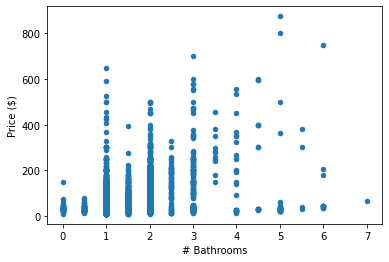

In [283]:
airbnb_train_cl_filtered.plot(kind = 'scatter',x='Bathrooms',y = 'Price')
plt.xlabel('# Bathrooms')
plt.ylabel('Price ($)')
plt.show()

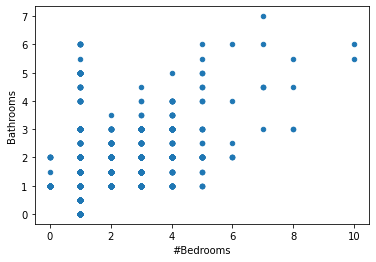

In [291]:
airbnb_train_cl_filtered.plot(kind = 'scatter',x='Bedrooms',y = 'Bathrooms')
plt.xlabel('#Bedrooms')
plt.ylabel('Bathrooms')
plt.show()

In [286]:
print(airbnb_train_cl.shape)
print(airbnb_train_cl_filtered.shape)

print(f'Pérdida: {((airbnb_train_cl.shape[0] - airbnb_train_cl_filtered.shape[0])/airbnb_train_cl.shape[0])*100}%')
#creo que quitando los datos anteriores vamos a mejorar 
#tal vez se podrian considerar mas outlier, pero por el momento lo dejo asi

(9854, 13)
(9851, 13)
Pérdida: 0.03044448954739192%


Una vez que hemos hecho un primer análisis exploratorios, el siguiente paso consiste en evaluar las correlaciones entre las diferente variables del problema. Habitualmente, esto nos puede servir para identificar posibles atributos que estén altamente correlacionados. 


In [287]:
airbnb_train_cl_filtered.corr().T # matriz de correlación

,Neighbourhood Cleansed,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Price,Guests Included,Number of Reviews,Review Scores Rating,Cancellation Policy
Neighbourhood Cleansed,1.000000,0.057372,0.248665,0.179769,0.145305,0.063865,0.108049,-0.005283,0.352824,0.113307,0.078031,0.006902,0.160927
Property Type,0.057372,1.000000,0.255405,0.118996,-0.014185,0.054485,0.059394,0.001149,0.111959,0.111737,0.019190,-0.011250,0.063477
Room Type,0.248665,0.255405,1.000000,0.527135,-0.022397,0.248901,0.314658,-0.018960,0.465957,0.377440,0.141155,-0.077278,0.185418
Accommodates,0.179769,0.118996,0.527135,1.000000,0.314879,0.673282,0.825623,0.036841,0.575153,0.595622,0.084982,-0.105861,0.210939
Bathrooms,0.145305,-0.014185,-0.022397,0.314879,1.000000,0.427830,0.360264,0.040997,0.353011,0.196661,-0.059766,0.033059,0.142540
Bedrooms,0.063865,0.054485,0.248901,0.673282,0.427830,1.000000,0.682336,0.069269,0.515902,0.448956,-0.031346,-0.010634,0.100414
Beds,0.108049,0.059394,0.314658,0.825623,0.360264,0.682336,1.000000,0.055179,0.479736,0.471379,0.034400,-0.083544,0.149273
Bed Type,-0.005283,0.001149,-0.018960,0.036841,0.040997,0.069269,0.055179,1.000000,0.034090,0.027714,-0.009774,0.014112,-0.008554
Price,0.352824,0.111959,0.465957,0.575153,0.353011,0.515902,0.479736,0.034090,1.000000,0.378704,-0.035476,0.053706,0.149893
Guests Included,0.113307,0.111737,0.377440,0.595622,0.196661,0.448956,0.471379,0.027714,0.378704,1.000000,0.120525,-0.055610,0.193412


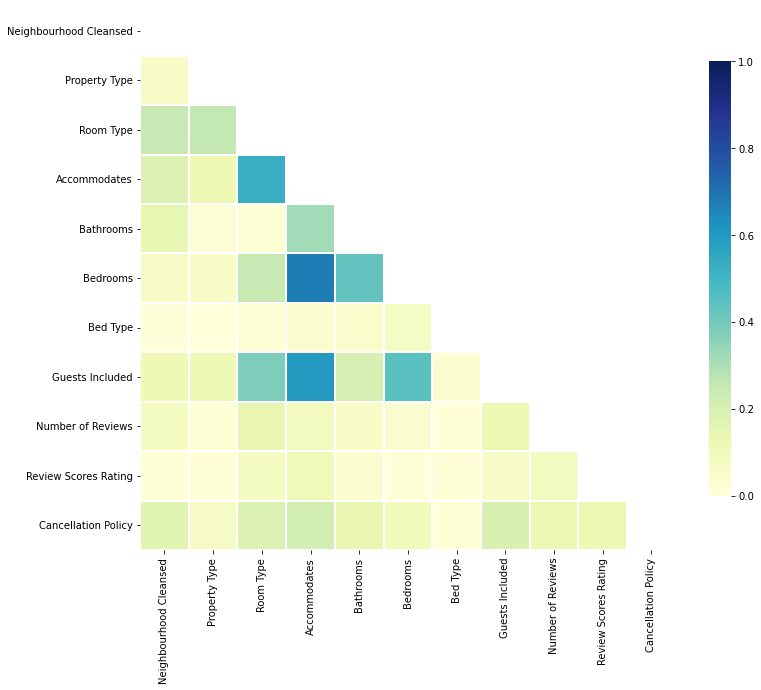

In [292]:
import seaborn as sns

# Compute the correlation matrix
corr = np.abs(airbnb_train_cl_filtered.drop(['Price'], axis=1).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

como podemos ver en la matriz de correlaccion las varibles Accommodates y  Beds tienen una colinealidad alta (82%) por lo que podemos eliminar una de ellas y esto tiene tambien sentido en cuanto a la naturaleza de los datos

In [289]:
airbnb_train_cl_filtered=airbnb_train_cl_filtered.drop(['Beds'], axis=1)

## dividir en X e y

In [293]:
from sklearn import preprocessing

In [334]:
airbnb_train_new = airbnb_train_cl_filtered
features = airbnb_train_new.columns.drop(['Price'])
X_train = airbnb_train_new[features].values    
y_train = airbnb_train_new['Price'].values     
feature_names=features
# Escalamos (con los datos de train)
scaler = preprocessing.StandardScaler().fit(X_train)
XtrainScaled = scaler.transform(X_train)

print('Datos X_TRain: ', X_train.shape)
print('Datos y_Train:  ', y_train.shape)

Datos X_TRain:  (9851, 11)
Datos y_Train:   (9851,)


utilizamos la capacidad de Lasso para seleccionar variables y ver si podemos eliminar alguna de ellas

In [306]:
features

Index(['Neighbourhood Cleansed', 'Property Type', 'Room Type', 'Accommodates',
       'Bathrooms', 'Bedrooms', 'Bed Type', 'Guests Included',
       'Number of Reviews', 'Review Scores Rating', 'Cancellation Policy'],
      dtype='object')

In [296]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

best mean cross-validation score: -1547.140
best parameters: {'alpha': 0.28117686979742307}


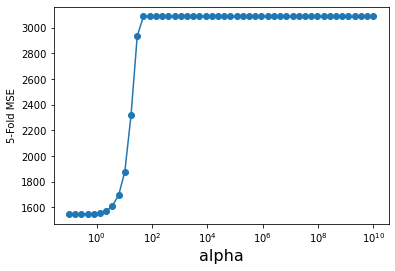

In [335]:
alpha_vector = np.logspace(-1,10,50)
param_grid = {'alpha': alpha_vector }
grid = GridSearchCV(Lasso(), scoring= 'neg_mean_squared_error', param_grid=param_grid, cv = 10)
grid.fit(XtrainScaled, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

#-1 porque es negado
scores = -1*np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(alpha_vector,scores,'-o')
plt.xlabel('alpha',fontsize=16)
plt.ylabel('5-Fold MSE')
plt.show()

In [308]:
from sklearn.metrics import mean_squared_error

alpha_optimo = grid.best_params_['alpha']
lasso = Lasso(alpha = alpha_optimo).fit(XtrainScaled,y_train)

ytrainLasso = lasso.predict(XtrainScaled)

mseTrainModelLasso = mean_squared_error(y_train,ytrainLasso)

print('MSE Modelo Lasso (train): %0.3g' % mseTrainModelLasso)


print('RMSE Modelo Lasso (train): %0.3g' % np.sqrt(mseTrainModelLasso))


w = lasso.coef_
for f,wi in zip(feature_names,w):
    print(f,wi)

MSE Modelo Lasso (train): 1.54e+03
RMSE Modelo Lasso (train): 39.2
Neighbourhood Cleansed 11.885472819546875
Property Type -0.0
Room Type 14.503085293112695
Accommodates 11.297660164843196
Bathrooms 8.536271044652759
Bedrooms 12.293686946220816
Bed Type 0.20480643774585006
Guests Included 0.7872070688771101
Number of Reviews -4.441023610903582
Review Scores Rating 4.446366537676397
Cancellation Policy -0.0


In [312]:
airbnb_train_new.describe().T
#El error que nos sale podemos ver que es bastante grande ya que la media esta en 65.65 y nuestro error es de 39 
#Tambien podemos ver que hay muchas variables que estan a cero las podriamos eliminar, los que tienen en Lasso el coeficiente cero
#Son Property Type -0.0 , Cancellation Policy -0.0, Bed Type 0.20480643774585006,Guests Included 0.7872070688771101

,count,mean,std,min,25%,50%,75%,max
Neighbourhood Cleansed,9851.0,65.643976,19.559799,17.000000,54.714286,66.655307,78.352137,280.000000
Property Type,9851.0,65.616556,6.233725,15.000000,67.402664,67.402664,67.402664,220.000000
Room Type,9851.0,65.694145,25.853330,32.066225,34.329278,86.942392,86.942392,86.942392
Accommodates,9851.0,3.182113,1.987098,1.000000,2.000000,2.000000,4.000000,16.000000
Bathrooms,9851.0,1.248959,0.582152,0.000000,1.000000,1.000000,1.000000,7.000000
Bedrooms,9851.0,1.289818,0.814312,0.000000,1.000000,1.000000,2.000000,10.000000
Bed Type,9851.0,65.609284,1.853992,43.214286,65.876446,65.876446,65.876446,65.876446
Price,9851.0,65.653233,55.559489,9.000000,30.000000,52.000000,80.000000,875.000000
Guests Included,9851.0,1.567760,1.056645,1.000000,1.000000,1.000000,2.000000,14.000000
Number of Reviews,9851.0,23.425338,38.975007,0.000000,1.000000,7.000000,28.000000,446.000000


Aplicamos todo lo que hemos hecho con los datos de train ahora en test

In [314]:
airbnb_test = pd.read_csv('./data/test.csv', sep= ';', decimal='.')
airbnb_test.head(2)

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,Notes,Transit,Access,Interaction,House Rules,Thumbnail Url,Medium Url,Picture Url,XL Picture Url,Host ID,Host URL,Host Name,Host Since,Host Location,Host About,Host Response Time,Host Response Rate,Host Acceptance Rate,Host Thumbnail Url,Host Picture Url,Host Neighbourhood,Host Listings Count,Host Total Listings Count,Host Verifications,Street,Neighbourhood,Neighbourhood Cleansed,Neighbourhood Group Cleansed,City,State,Zipcode,Market,Smart Location,Country Code,Country,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Square Feet,Price,Weekly Price,Monthly Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Calendar Updated,Has Availability,Availability 30,Availability 60,Availability 90,Availability 365,Calendar last Scraped,Number of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,8900002,https://www.airbnb.com/rooms/8900002,20170407214119,2017-04-08,Single room in the centre of Madrid,"Habitación luminosa con cama individual, en un...",La habitación es luminosa y consta de cama ind...,"Habitación luminosa con cama individual, en un...",none,El edificio está cerca de los principales muse...,"Además del entorno, del edificio y de la atenc...",El metro más próximo es el de la Puerta del So...,"Los viajeros podrán utilizar su dormitorio, la...",Sí. Los huespedes estarán atendidos personalme...,Se requiere que los huéspedes sean personar re...,https://a0.muscache.com/im/pictures/56d41099-0...,https://a0.muscache.com/im/pictures/56d41099-0...,https://public.opendatasoft.com/api/explore/v2...,https://a0.muscache.com/im/pictures/56d41099-0...,45745549,https://www.airbnb.com/users/show/45745549,Cristina,2015-10-04,"Madrid, Community of Madrid, Spain",Soy arquitecta y trabajo en mi casa. También ...,within an hour,100.0,NaN,https://a0.muscache.com/im/users/45745549/prof...,https://a0.muscache.com/im/users/45745549/prof...,Sol,2.0,2.0,"email,phone,facebook,reviews","Sol, Madrid, Comunidad de Madrid 28012, Spain",Sol,Sol,Centro,Madrid,Comunidad de Madrid,28012,Madrid,"Madrid, Spain",ES,Spain,40.415511,-3.703865,Apartment,Private room,1,1.5,1.0,1.0,Real Bed,"TV,Wireless Internet,Kitchen,Smoking allowed,P...",NaN,35.0,200.0,750.0,NaN,20.0,1,0,1,1125,today,NaN,0,0,11,286,2017-04-08,7,2015-11-04,2017-04-03,91.0,10.0,9.0,10.0,10.0,9.0,9.0,NaN,NaN,flexible,2.0,0.4,"40.415511162179065, -3.7038654850470616","Host Has Profile Pic,Is Location Exact,Require..."
1,8528760,https://www.airbnb.com/rooms/8528760,20170407214119,2017-04-08,CITY CENTER OPERA SQUARE ROOM 2,Habitación con cama doble y balcón a la Plaza ...,Una gran opción si deseas vivir en el centro d...,Habitación con cama doble y balcón a la Plaza ...,none,"Se encuentra en la zona de Palacio, por lo que...",NaN,"Los metros más cercanos serían Ópera (L2, L5 y...",Tendrían a sus disposición todas las zonas com...,Estaremos a vuestra disposición para cualquier...,NaN,https://a0.muscache.com/im/pictures/2824791e-0...,https://a0.muscache.com/im/pictures/2824791e-0...,https://public.opendatasoft.com/api/explore/v2...,https://a0.muscache.com/im/pictures/2824791e-0...,15258781,https://www.airbnb.com/users/show/15258781,Erasmo´S,2014-05-08,"Madrid, Community of Madrid, Spain",Disfruta de tu habitación en el centro de Madr...,within a few hours,100.0,NaN,https://a0.muscache.com/im/users/15258781/prof...,https://a0.muscache.com/im/users/15258781/prof...,Justicia,114.0,114.0,"email,phone,reviews,work_email","Palacio, Madrid, Comunidad de Madrid 28013, Spain",Palacio,Palacio,Centro,Madrid,Comunidad de Madrid,28013,Madrid,"Madrid, Spain",

In [328]:
airbnb_test_cl = airbnb_test.drop(['Zipcode','ID','Listing Url','Scrape ID','Last Scraped','Name', 'Summary','Space','Description','Experiences Offered','Neighborhood Overview','Notes','Transit','Access' ,'Interaction', 'House Rules' ,'Thumbnail Url', 'Medium Url','Picture Url','XL Picture Url','Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location', 'Host About','Host Response Time','Host Response Rate','Host Acceptance Rate','Host Thumbnail Url','Host Picture Url', 'Host Neighbourhood','Host Listings Count','Host Total Listings Count','Host Verifications','Street','Neighbourhood','Neighbourhood Group Cleansed','State','Market','Smart Location','Country Code','Country','Latitude','Longitude','Amenities', 'Security Deposit','Cleaning Fee','Extra People','Minimum Nights','Maximum Nights','Calendar Updated','Has Availability','Availability 30','Availability 60','Availability 90','Availability 365','Calendar last Scraped', 'First Review','Last Review','Review Scores Accuracy','Review Scores Cleanliness','Review Scores Checkin','Weekly Price', 'Monthly Price','Review Scores Communication','Review Scores Location','Review Scores Value','License','Jurisdiction Names','Calculated host listings count','Reviews per Month','Geolocation','Features' ], axis=1)

airbnb_test_cl = airbnb_test_cl.loc[airbnb_test_cl['City']=='Madrid']

airbnb_test_cl = airbnb_test_cl.drop(['City'], axis=1)
airbnb_test_cl = airbnb_test_cl.drop(['Square Feet'], axis=1)
airbnb_test_cl=airbnb_test_cl.loc[airbnb_test_cl['Price'].isnull()==False]
categorical = ['Neighbourhood Cleansed', 'Property Type', 'Room Type','Bed Type','Cancellation Policy']
mean_map = {}
for c in categorical:
    mean = airbnb_test_cl.groupby(c)['Price'].mean()
    airbnb_test_cl[c] = airbnb_test_cl[c].map(mean)    
    mean_map[c] = mean

airbnb_test_cl["Review Scores Rating"].fillna(airbnb_test_cl["Review Scores Rating"].mean(), inplace=True)
airbnb_test_cl=airbnb_test_cl.dropna()
filtro = airbnb_test_cl[(airbnb_test_cl['Bedrooms'] >9 ) &( airbnb_test_cl['Bathrooms'] <2)]
filtro2 = airbnb_test_cl[(airbnb_test_cl['Bedrooms'] <2 ) &( airbnb_test_cl['Bathrooms'] >7)]
airbnb_test_cl_filtered = airbnb_test_cl.drop(filtro.index)
airbnb_test_cl_filtered = airbnb_test_cl_filtered.drop(filtro2.index)
airbnb_test_cl_filtered=airbnb_test_cl_filtered.drop(['Beds'], axis=1)
airbnb_test_cl.isnull().any()

Neighbourhood Cleansed    False
Property Type             False
Room Type                 False
Accommodates              False
Bathrooms                 False
Bedrooms                  False
Beds                      False
Bed Type                  False
Price                     False
Guests Included           False
Number of Reviews         False
Review Scores Rating      False
Cancellation Policy       False
dtype: bool

In [356]:
airbnb_test_new = airbnb_test_cl_filtered

features = airbnb_test_new.columns.drop(['Price'])
X_test = airbnb_test_new[features].values    
y_test = airbnb_test_new['Price'].values 

In [357]:
airbnb_test_new.shape

(3261, 12)

In [333]:
# Escalamos (con los datos de train)

XtestScaled = scaler.transform(X_test) 

print('Datos X_TRain: ', X_test.shape)
print('Datos y_Train:  ', y_test.shape)

Datos X_TRain:  (3261, 11)
Datos y_Train:   (3261,)


In [337]:
ytestLasso  = lasso.predict(XtestScaled)
mseTrainModelLasso = mean_squared_error(y_train,ytrainLasso)
mseTestModelLasso = mean_squared_error(y_test,ytestLasso)

print('MSE Modelo Lasso (train): %0.3g' % mseTrainModelLasso)
print('MSE Modelo Lasso (test) : %0.3g' % mseTestModelLasso)

print('RMSE Modelo Lasso (train): %0.3g' % np.sqrt(mseTrainModelLasso))
print('RMSE Modelo Lasso (test) : %0.3g' % np.sqrt(mseTestModelLasso))



MSE Modelo Lasso (train): 1.54e+03
MSE Modelo Lasso (test) : 1.56e+03
RMSE Modelo Lasso (train): 39.2
RMSE Modelo Lasso (test) : 39.5


Lo que podemos ver es que aunque el modelo que tenemos no es muy bueno ya que cometemos bastante error tanto en train como en test, hay una cosa buena, no hay overfitting

In [338]:
airbnb_test_new.describe().T

,count,mean,std,min,25%,50%,75%,max
Neighbourhood Cleansed,3261.0,66.884674,20.753039,15.000000,55.950000,70.000000,80.520000,248.000000
Property Type,3261.0,66.908055,7.656081,20.000000,68.470000,68.470000,68.470000,155.000000
Room Type,3261.0,67.003332,26.726192,21.500000,34.025641,88.345035,88.345035,88.345035
Accommodates,3261.0,3.226311,1.986996,1.000000,2.000000,3.000000,4.000000,16.000000
Bathrooms,3261.0,1.255443,0.606386,0.000000,1.000000,1.000000,1.000000,6.500000
Bedrooms,3261.0,1.305121,0.852172,0.000000,1.000000,1.000000,2.000000,10.000000
Bed Type,3261.0,66.878994,2.794489,39.285714,67.245271,67.245271,67.245271,67.245271
Price,3261.0,66.840540,57.335711,9.000000,31.000000,54.000000,80.000000,850.000000
Guests Included,3261.0,1.605949,1.167116,1.000000,1.000000,1.000000,2.000000,16.000000
Number of Reviews,3261.0,22.260350,36.226469,0.000000,1.000000,8.000000,28.000000,344.000000


# 2.2 Random forest

Utilizamos otro modelo para el calculo de nuestro precio, en este caso el Random Forest donde tambien podremos ver la relevancia de las variabes. Se entrena el modelo con muchos árboles de decisión por lo que nos da datos más fiables que al realizar el estudio sólo con un árbol.

In [339]:
from sklearn.ensemble import RandomForestRegressor

Fitting 10 folds for each of 14 candidates, totalling 140 fits
[CV] END ........................................max_depth=1; total time=   0.4s
[CV] END ........................................max_depth=1; total time=   0.4s
[CV] END ........................................max_depth=1; total time=   0.5s
[CV] END ........................................max_depth=1; total time=   0.4s
[CV] END ........................................max_depth=1; total time=   0.5s
[CV] END ........................................max_depth=1; total time=   0.4s
[CV] END ........................................max_depth=1; total time=   0.4s
[CV] END ........................................max_depth=1; total time=   0.4s
[CV] END ........................................max_depth=1; total time=   0.4s
[CV] END ........................................max_depth=1; total time=   0.4s
[CV] END ........................................max_depth=2; total time=   0.5s
[CV] END .....................................

[CV] END .......................................max_depth=11; total time=   1.7s
[CV] END .......................................max_depth=11; total time=   1.5s
[CV] END .......................................max_depth=11; total time=   1.6s
[CV] END .......................................max_depth=11; total time=   1.5s
[CV] END .......................................max_depth=11; total time=   1.6s
[CV] END .......................................max_depth=11; total time=   1.5s
[CV] END .......................................max_depth=11; total time=   1.5s
[CV] END .......................................max_depth=11; total time=   1.5s
[CV] END .......................................max_depth=11; total time=   1.6s
[CV] END .......................................max_depth=12; total time=   1.8s
[CV] END .......................................max_depth=12; total time=   1.9s
[CV] END .......................................max_depth=12; total time=   1.8s
[CV] END ...................

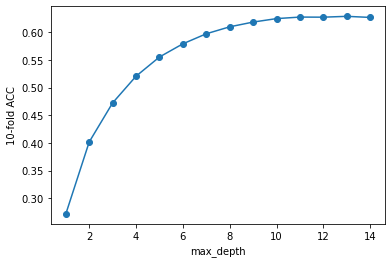

In [349]:
#Queremos saber cual sera nuestro parametro de profuncidad de nuestro arbol
maxDepth = range(1,15)
tuned_parameters = {'max_depth': maxDepth}
#n_estimators el numero de arboles con lo que lo queremos entrenar lo fijamos
grid = GridSearchCV(RandomForestRegressor(random_state=0, n_estimators=200, max_features='sqrt'), param_grid=tuned_parameters,cv=10, verbose=2) 
grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth')
plt.ylabel('10-fold ACC')

plt.show()

In [350]:
maxDepthOptimo = grid.best_params_['max_depth']
bagModel = RandomForestRegressor(max_depth=maxDepthOptimo,n_estimators=200,max_features='sqrt').fit(X_train,y_train)

print("Train: ",bagModel.score(X_train,y_train))
print("Test: ",bagModel.score(X_test,y_test))

Train:  0.8431308972892729
Test:  0.6022592823763496


In [ ]:
#con el dato anterior de max_depth puedo ver que hay bastante overfitting por lo tanto voy a cambiarlo,
#ademas reduzco la complejidad del modelo, voy a dejarlo a 7 

In [352]:
maxDepthOptimo = 7
bagModel = RandomForestRegressor(max_depth=maxDepthOptimo,n_estimators=200,max_features='sqrt').fit(X_train,y_train)

print("Train: ",bagModel.score(X_train,y_train))
print("Test: ",bagModel.score(X_test,y_test))

Train:  0.6705702885835079
Test:  0.5920930849953889


In [ ]:
#hemos reducido el overfitting pero aumentado el error

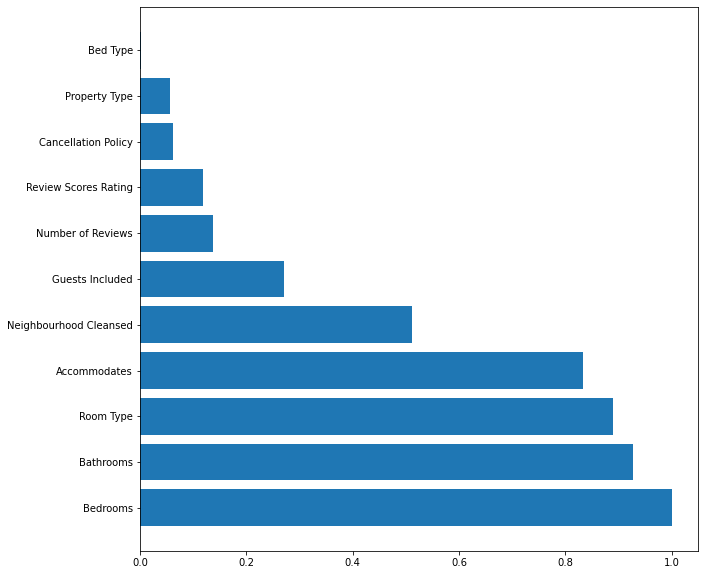

In [353]:
importances = bagModel.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,10))
plt.barh(range(X_train.shape[1]),importances[indices])
plt.yticks(range(X_train.shape[1]),feature_names[indices])
plt.show()

In [ ]:
#Las variables que nos habian salido en Lasso eran: 
# Property Type -0.0 , Cancellation Policy -0.0, Bed Type 0.20480643774585006,Guests Included 0.7872070688771101

Lo que vemos que tanto  Property Type, Cancellation Policy , Bed Type aparecen en ambos modelos como variables poco importantes, encambio con el estudio de Random Forest vemos que Guests Included no se puede eliminar tan facilmente ya que si que parece que influye en el precio.

## Boosted Trees

Vamos a realizar el estudio del problema mediante Boostrees. El entrenamiento del algoritmo de boosting requiere fijar tres parámetros libres: 
- Número de iteraciones
- Tasa de aprendizaje (𝛼)
- Complejidad del árbol: max_depth

Voy a fijar la la max_depth.Para ello voy a hacer una pequeña comprobación solo con un arbol de decisión y ver cual sería la max_depth, de esta forma poder hacer el estudio Boosted Trees con ese parametro fijado.

Fitting 10 folds for each of 14 candidates, totalling 140 fits
best mean cross-validation score: 0.524
best parameters: {'max_depth': 6}


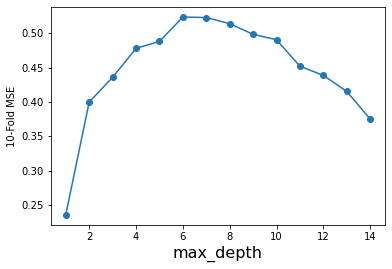

In [358]:
from sklearn.tree import DecisionTreeRegressor

# Tu código aquí
maxDepth = range(1,15)
param_grid = {'max_depth': maxDepth }
grid = GridSearchCV(DecisionTreeRegressor(random_state=0), param_grid=param_grid, cv = 10, verbose=1)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth',fontsize=16)
plt.ylabel('10-Fold MSE')
#plt.ylim((-1, 0))
plt.show()

In [359]:
# Tu código aquí
maxDepthOptimo = grid.best_params_['max_depth'] 
treeModel = DecisionTreeRegressor(max_depth=maxDepthOptimo).fit(X_train,y_train)

print("Train: ",treeModel.score(X_train,y_train))
print("Test: ",treeModel.score(X_test,y_test))

Train:  0.6232177748079101
Test:  0.469919462827721


In [361]:
# disminuyo la profundidad porque veo overfitting
maxDepthOptimo = 5#grid.best_params_['max_depth'] 
treeModel = DecisionTreeRegressor(max_depth=maxDepthOptimo).fit(X_train,y_train)

print("Train: ",treeModel.score(X_train,y_train))
print("Test: ",treeModel.score(X_test,y_test))

Train:  0.5840747347577026
Test:  0.48912765113775414


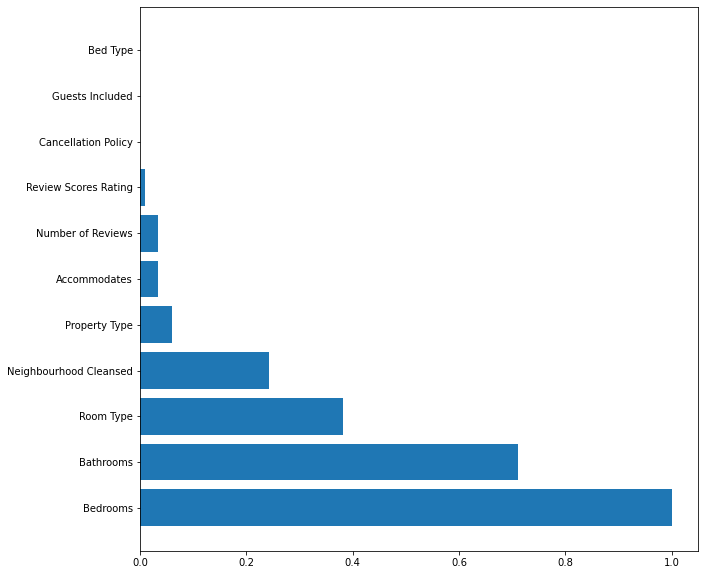

In [362]:
importances = treeModel.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,10))
plt.barh(range(X_train.shape[1]),importances[indices])
plt.yticks(range(X_train.shape[1]),feature_names[indices])
plt.show()

In [ ]:
#Anteriormente nos ha salido en el rango de importancia de las variables unos datos diferentes, 
#aunque si que es verdad que tanto bedrooms com bathrooms y por el otro lado Bed type estan ambas en las mismas posiciones
#encontramos diferencias en las variables intermedias. Pero sabemos siempre va a ser más fiable el Raking obtenido anteriormente por Random Forest

In [363]:
from sklearn.ensemble import GradientBoostingRegressor

Niterations = [500,1000,1500,2000]
learningRate = [0.1,0.05]
# mantenemos max_depth estático: max_depth=5

param_grid = {'n_estimators': Niterations,'learning_rate':learningRate }
grid = GridSearchCV(GradientBoostingRegressor(random_state=0, max_depth=5), param_grid=param_grid, cv = 5, verbose=2)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END ................learning_rate=0.1, n_estimators=500; total time=   5.8s
[CV] END ................learning_rate=0.1, n_estimators=500; total time=   5.8s
[CV] END ................learning_rate=0.1, n_estimators=500; total time=   6.2s
[CV] END ................learning_rate=0.1, n_estimators=500; total time=   6.1s
[CV] END ................learning_rate=0.1, n_estimators=500; total time=   5.8s
[CV] END ...............learning_rate=0.1, n_estimators=1000; total time=  12.3s
[CV] END ...............learning_rate=0.1, n_estimators=1000; total time=  12.1s
[CV] END ...............learning_rate=0.1, n_estimators=1000; total time=  12.2s
[CV] END ...............learning_rate=0.1, n_estimators=1000; total time=  12.1s
[CV] END ...............learning_rate=0.1, n_estimators=1000; total time=  12.2s
[CV] END ...............learning_rate=0.1, n_estimators=1500; total time=  17.5s
[CV] END ...............learning_rate=0.1, n_esti

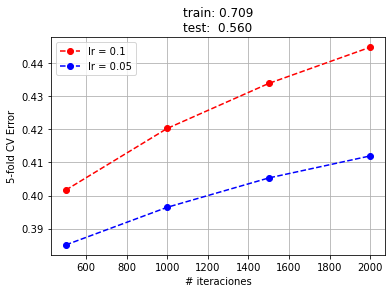

In [364]:
lrOptimo = grid.best_params_['learning_rate']
neOptimo = grid.best_params_['n_estimators']
bt = GradientBoostingRegressor(random_state=0, max_depth=3,learning_rate=lrOptimo, n_estimators=neOptimo)
bt.fit(X_train,y_train)

error = 1-grid.cv_results_['mean_test_score'].reshape(len(learningRate),len(Niterations))
colors = ['r','b','g','k','m']
for i,lr in enumerate(learningRate):    
    plt.plot(Niterations,error[i,:],colors[i] + '--o',label='lr = %g'%lr)

plt.legend()
plt.xlabel('# iteraciones')
plt.ylabel('5-fold CV Error')
plt.title('train: %0.3f\ntest:  %0.3f'%(bt.score(X_train,y_train),bt.score(X_test,y_test)))
plt.grid()
plt.show()

In [ ]:
#como vemos el resultado obtenido esta en 0.05 y numero de iteraciones en 500, voy ampliar este barrido, y bajo la profundidad del árbol para disminuir la complejidad

In [365]:
Niterations = [150,300,500,1000]
learningRate = [0.1,0.05,0.01, 0.005]
# mantenemos max_depth estático: max_depth=3

param_grid = {'n_estimators': Niterations,'learning_rate':learningRate }
grid = GridSearchCV(GradientBoostingRegressor(random_state=0, max_depth=3), param_grid=param_grid, cv = 5, verbose=2)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END ................learning_rate=0.1, n_estimators=150; total time=   1.3s
[CV] END ................learning_rate=0.1, n_estimators=150; total time=   1.4s
[CV] END ................learning_rate=0.1, n_estimators=150; total time=   1.2s
[CV] END ................learning_rate=0.1, n_estimators=150; total time=   1.2s
[CV] END ................learning_rate=0.1, n_estimators=150; total time=   1.2s
[CV] END ................learning_rate=0.1, n_estimators=300; total time=   2.3s
[CV] END ................learning_rate=0.1, n_estimators=300; total time=   2.3s
[CV] END ................learning_rate=0.1, n_estimators=300; total time=   2.5s
[CV] END ................learning_rate=0.1, n_estimators=300; total time=   2.6s
[CV] END ................learning_rate=0.1, n_estimators=300; total time=   2.3s
[CV] END ................learning_rate=0.1, n_estimators=500; total time=   3.9s
[CV] END ................learning_rate=0.1, n_es

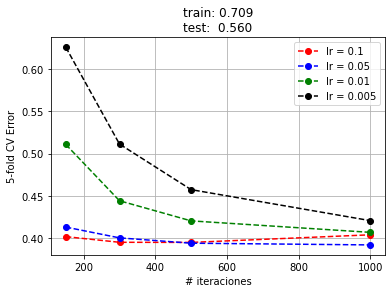

In [366]:
error = 1-grid.cv_results_['mean_test_score'].reshape(len(learningRate),len(Niterations))
colors = ['r','b','g','k','m']
for i,lr in enumerate(learningRate):    
    plt.plot(Niterations,error[i,:],colors[i] + '--o',label='lr = %g'%lr)

plt.legend()
plt.xlabel('# iteraciones')
plt.ylabel('5-fold CV Error')
plt.title('train: %0.3f\ntest:  %0.3f'%(bt.score(X_train,y_train),bt.score(X_test,y_test)))
plt.grid()
plt.show()

In [ ]:
#voy a hacer un ultimo barrido para asegurarme el numero de iteraciones con esta profundidad de árbol, los datos obtenidos no han cambido con respecto al barrido anterior
#los mejores datos para (𝛼) son 0.1 y 0.05 como hemos visto anteriormente

In [367]:
Niterations = [1000,1500,2000]
learningRate = [0.1,0.05,0.01]
# mantenemos max_depth estático: max_depth=3

param_grid = {'n_estimators': Niterations,'learning_rate':learningRate }
grid = GridSearchCV(GradientBoostingRegressor(random_state=0, max_depth=3), param_grid=param_grid, cv = 5, verbose=2)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ...............learning_rate=0.1, n_estimators=1000; total time=   8.0s
[CV] END ...............learning_rate=0.1, n_estimators=1000; total time=   8.0s
[CV] END ...............learning_rate=0.1, n_estimators=1000; total time=   8.1s
[CV] END ...............learning_rate=0.1, n_estimators=1000; total time=   8.1s
[CV] END ...............learning_rate=0.1, n_estimators=1000; total time=   8.1s
[CV] END ...............learning_rate=0.1, n_estimators=1500; total time=  12.3s
[CV] END ...............learning_rate=0.1, n_estimators=1500; total time=  12.6s
[CV] END ...............learning_rate=0.1, n_estimators=1500; total time=  12.2s
[CV] END ...............learning_rate=0.1, n_estimators=1500; total time=  12.1s
[CV] END ...............learning_rate=0.1, n_estimators=1500; total time=  11.9s
[CV] END ...............learning_rate=0.1, n_estimators=2000; total time=  15.3s
[CV] END ...............learning_rate=0.1, n_esti

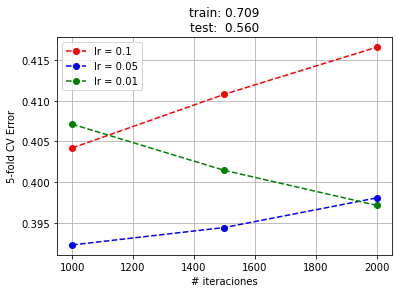

In [369]:
error = 1-grid.cv_results_['mean_test_score'].reshape(len(learningRate),len(Niterations))
colors = ['r','b','g','k','m']
for i,lr in enumerate(learningRate):    
    plt.plot(Niterations,error[i,:],colors[i] + '--o',label='lr = %g'%lr)

plt.legend()
plt.xlabel('# iteraciones')
plt.ylabel('5-fold CV Error')
plt.title('train: %0.3f\ntest:  %0.3f'%(bt.score(X_train,y_train),bt.score(X_test,y_test)))
plt.grid()
plt.show()

In [ ]:
#nos vuelve a salir los datos anteriores de (𝛼) y de iteraciones 1000 por lo que cuncluimos el estudio que para nuestro modelo 
# los mejores valores seran Tasa de aprendizaje= 0.05 y numero de iteraciones 1000

## importacia de las variables

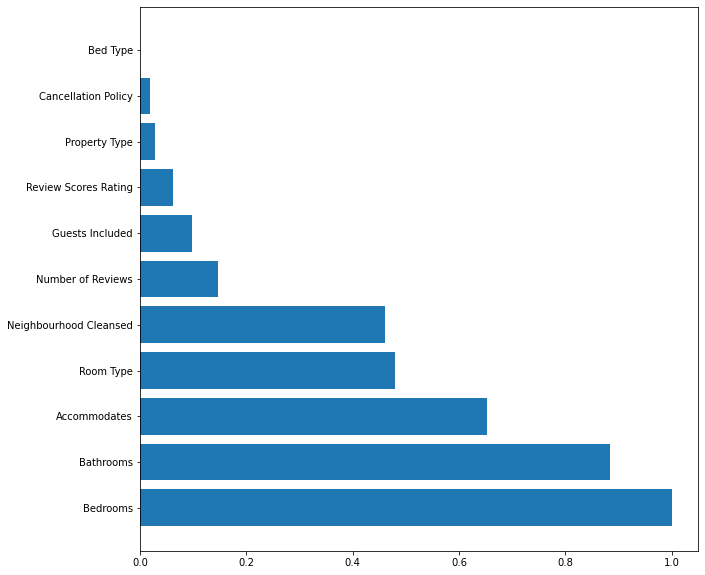

In [368]:
importances = bt.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,10))
plt.barh(range(X_train.shape[1]),importances[indices])
plt.yticks(range(X_train.shape[1]),feature_names[indices])
plt.show()

In [ ]:
#Con este modelo vemos que es muy similar al obtenido por random Forest

Este algoritmo nos proporciona unas graficas de dependencia de las variables frente a la variable objetivo
## Representemos los conocidos como partial dependence plots:

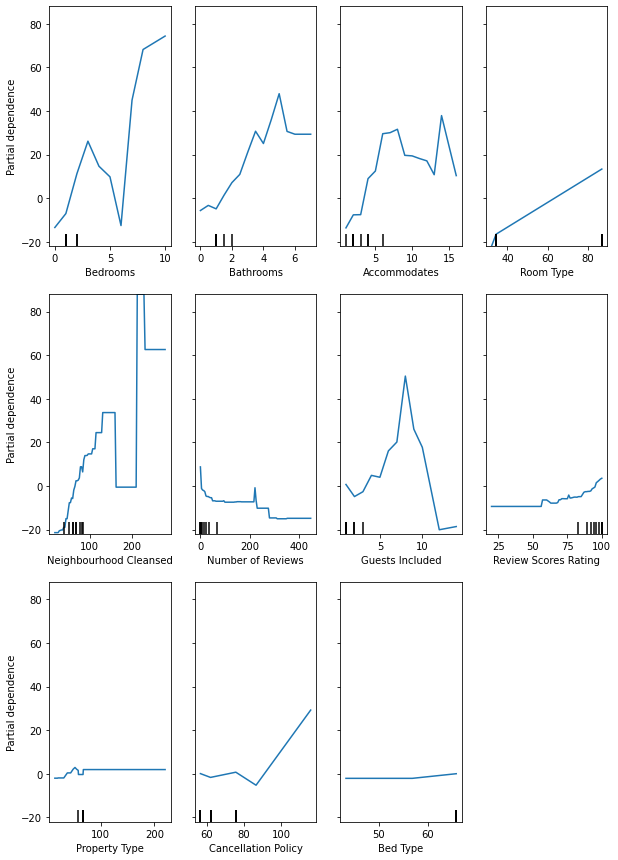

In [370]:
from sklearn.inspection import plot_partial_dependence

importances = bt.feature_importances_
importances = importances / np.max(importances)
indices = np.argsort(importances)[::-1]

plot_partial_dependence(bt, X_train, indices, feature_names=feature_names, percentiles=(0.0, 1.0), n_cols = 4)
fig = plt.gcf()
fig.set_size_inches(10,15)
plt.show()

Lo que si que podemos ver claramente con estas graficas es la dependencia Bed Type y Property Type es muy baja frente a la variable objetivo ya que la grafica es muy plana.
Para Bedrooms aunque la tendencia esta clara a que cuantas mas habitaciones hay mas alto es el precio, hay un pico entorno a las 6 habitaciones que habria que intentar ver si es por culpa de posibles datos erróneos.
En cuanto al número de Bathrooms, también podemos decir que hay una tendencia clara a que cuantos más baños hay el precio es mayor. Aunque se termina estancando cuando se superan el número de baños a 5.

## Conclusión

Despues de todos los modelos utilizados, creo que el que mejor generaliza en nuestro caso es RandomForest.
Así que voy intentar dar una solución más sencilla y generalizada reduciendo el número de variables.
Empiezo desde el principio para asegurarme que no tengo los datos viciados.

In [403]:
airbnb = pd.read_csv('./data/airbnb-listings.csv', sep= ';', decimal='.')
#airbnb.head() # visualizamos 5 primeras filas
pd.options.display.max_columns = None #Para poder ver todas la columnas ya que trasponiendo son 89 colunas y me continua poniendo puntos suspensivos
airbnb.head()     

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,Notes,Transit,Access,Interaction,House Rules,Thumbnail Url,Medium Url,Picture Url,XL Picture Url,Host ID,Host URL,Host Name,Host Since,Host Location,Host About,Host Response Time,Host Response Rate,Host Acceptance Rate,Host Thumbnail Url,Host Picture Url,Host Neighbourhood,Host Listings Count,Host Total Listings Count,Host Verifications,Street,Neighbourhood,Neighbourhood Cleansed,Neighbourhood Group Cleansed,City,State,Zipcode,Market,Smart Location,Country Code,Country,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Square Feet,Price,Weekly Price,Monthly Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Calendar Updated,Has Availability,Availability 30,Availability 60,Availability 90,Availability 365,Calendar last Scraped,Number of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,15141125,https://www.airbnb.com/rooms/15141125,20170407214119,2017-04-08,Panoramic charming studio!,"Charming bright and cosy studio in ""El Rastro""...",It's a bright and cosy studio located in the h...,"Charming bright and cosy studio in ""El Rastro""...",none,The studio is located in the remarkable neighb...,NaN,The closest metro is La latina which will take...,The full studio will be entirely to the guests...,I am delighted to preform the check in at the ...,NaN,https://a0.muscache.com/im/pictures/d1a2212d-c...,https://a0.muscache.com/im/pictures/d1a2212d-c...,https://public.opendatasoft.com/api/explore/v2...,https://a0.muscache.com/im/pictures/d1a2212d-c...,96019257,https://www.airbnb.com/users/show/96019257,Marina,2016-09-20,"Madrid, Community of Madrid, Spain",I have a serious addiction for traveling :0l! ...,within an hour,100.0,NaN,https://a0.muscache.com/im/pictures/fffbb86e-5...,https://a0.muscache.com/im/pictures/fffbb86e-5...,NaN,2.0,2.0,"email,phone,facebook,reviews,jumio,government_id","Madrid, Comunidad de Madrid 28005, Spain",NaN,Embajadores,Centro,Madrid,Comunidad de Madrid,28005,Madrid,"Madrid, Spain",ES,Spain,40.407453,-3.707995,Loft,Entire home/apt,2,1.0,0.0,1.0,Real Bed,"TV,Internet,Wireless Internet,Kitchen,Pets all...",NaN,50.0,NaN,NaN,100.0,20.0,2,15,2,1125,today,NaN,13,24,42,66,2017-04-07,30,2016-10-15,2017-03-31,96.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,NaN,moderate,2.0,5.11,"40.40745268477803, -3.7079954754432634","Host Is Superhost,Host Has Profile Pic,Host Id..."
1,9470166,https://www.airbnb.com/rooms/9470166,20170407214119,2017-04-08,Comfortable penthouse in the center,"In the center, recently remodeled, comfortable...",Quiet and comfortable space where you can rela...,"In the center, recently remodeled, comfortable...",none,It belongs to the district center of Madrid wh...,A la misma distancia en tiempo podrás acceder ...,"The nearest Metro station is Tirso de Molina ,...","You will be alone, while you are in my flat an...",If you have any questions while you are in the...,Check ins after 21h to 22h have an extra cost ...,https://a0.muscache.com/im/pictures/3eb59287-8...,https://a0.muscache.com/im/pictures/3eb59287-8...,https://public.opendatasoft.com/api/explore/v2...,https://a0.muscache.com/im/pictures/3eb59287-8...,9885245,https://www.airbnb.com/users/show/9885245,Jorge,2013-11-08,"Madrid, Community of Madrid, Spain",NaN,within an hour,100.0,NaN,https://a0.muscache.com/im/users/9885245/profi...,https://a0.muscache.com/im/users/9885245/profi...,Hortaleza,13.0,13.0,"email,phone,reviews,jumio","Madrid, Comunidad de Madrid 28012, Spain",NaN,Embajadores,Centro,Madrid,Comunidad de Madrid,28012,Madrid,"Madrid, Spain",ES,Spain,40.408316,-3.705006,Apartment,Entire

In [404]:
train, test = train_test_split(airbnb_extract, test_size=0.25, shuffle=True, random_state=0)

print(f'training: {train.shape}')
print(f'test: {test.shape}')

train.to_csv('./data/train.csv', sep=';', decimal='.', index=False)
test.to_csv('./data/test.csv', sep=';', decimal='.', index=False)

training: (11085, 89)
test: (3695, 89)


In [405]:
airbnb_train = pd.read_csv('./data/train.csv', sep= ';', decimal='.')
airbnb_train.head(2)

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,Notes,Transit,Access,Interaction,House Rules,Thumbnail Url,Medium Url,Picture Url,XL Picture Url,Host ID,Host URL,Host Name,Host Since,Host Location,Host About,Host Response Time,Host Response Rate,Host Acceptance Rate,Host Thumbnail Url,Host Picture Url,Host Neighbourhood,Host Listings Count,Host Total Listings Count,Host Verifications,Street,Neighbourhood,Neighbourhood Cleansed,Neighbourhood Group Cleansed,City,State,Zipcode,Market,Smart Location,Country Code,Country,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Square Feet,Price,Weekly Price,Monthly Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Calendar Updated,Has Availability,Availability 30,Availability 60,Availability 90,Availability 365,Calendar last Scraped,Number of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,215377,https://www.airbnb.com/rooms/215377,20170407214119,2017-04-08,Precioso Apartamento en el centro,Precioso apartamento en una de las mejores zon...,Fantástico apartamento situado en el centro de...,Precioso apartamento en una de las mejores zon...,none,NaN,NaN,NaN,NaN,NaN,Que se cuide como si fuese la propia.,NaN,NaN,https://public.opendatasoft.com/api/explore/v2...,NaN,1111901,https://www.airbnb.com/users/show/1111901,Carmen,2011-09-05,spain,Hola a todos y a todas!! Espero que disfrutéis...,within a day,100.0,NaN,https://a0.muscache.com/im/users/1111901/profi...,https://a0.muscache.com/im/users/1111901/profi...,Centro,1.0,1.0,"email,phone,reviews","Centro, Madrid, Comunidad de Madrid, Spain",Centro,Cortes,Centro,Madrid,Comunidad de Madrid,NaN,Madrid,"Madrid, Spain",ES,Spain,40.412672,-3.699217,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"TV,Internet,Wireless Internet,Air conditioning...",NaN,70.0,450.0,1350.0,100.0,30.0,1,0,2,1125,3 weeks ago,NaN,29,59,89,179,2017-04-08,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,strict,1.0,NaN,"40.412672280122216, -3.6992168888748926","Host Has Profile Pic,Requires License"
1,17074266,https://www.airbnb.com/rooms/17074266,20170407214119,2017-04-08,Precioso apartamento exterior en Atocha,"Alojamiento bueno para parejas, aventureros, y...",El apartamento es exterior y con bastante luz....,"Alojamiento bueno para parejas, aventureros, y...",none,Es un barrio tranquilo y tiene la estación de ...,Supermercado a 2 minutos caminando.,Es una zona de fácil aparcamiento y tiene dos ...,Todo el apartamento está disponible para ti. C...,"En el caso de necesitar mi ayuda, estoy dispon...",NaN,https://a0.muscache.com/im/pictures/29ab574c-4...,https://a0.muscache.com/im/pictures/29ab574c-4...,https://public.opendatasoft.com/api/explore/v2...,https://a0.muscache.com/im/pictures/29ab574c-4...,114439291,https://www.airbnb.com/users/show/114439291,Javier,2017-02-02,"Madrid, Community of Madrid, Spain",NaN,within a few hours,100.0,NaN,https://a0.muscache.com/im/pictures/07bd23d3-3...,https://a0.muscache.com/im/pictures/07bd23d3-3...,Palos do Moguer,1.0,1.0,"email,phone,reviews,work_email","Palos do Moguer, Madrid, Comunidad de Madrid 2...",Palos do Moguer,Palos de Moguer,Arganzuela,Madrid,Comunidad de Madrid,28012,Madrid,"Madrid, Spain",ES,Spain,40.403869,-3.698641,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"Wireless Internet,Air conditioning,Kitchen,Bre...",NaN,55.0,NaN,NaN,NaN,15.0,2,15,2,1125,a week ago,NaN,1,1,6,7,2017-04-07,6,2017-02-10,2017-03-26,93.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,NaN,moderate,1.0,3.1,"40.40386893572995, -3.6986410064048783","Host Has Profile Pic,Is Location Exact,Require..."


In [406]:
airbnb_train_cl = airbnb_train.drop(['Zipcode','ID','Listing Url','Scrape ID','Last Scraped','Name', 'Summary','Space','Description','Experiences Offered','Neighborhood Overview','Notes','Transit','Access' ,'Interaction', 'House Rules' ,'Thumbnail Url', 'Medium Url','Picture Url','XL Picture Url','Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location', 'Host About','Host Response Time','Host Response Rate','Host Acceptance Rate','Host Thumbnail Url','Host Picture Url', 'Host Neighbourhood','Host Listings Count','Host Total Listings Count','Host Verifications','Street','Neighbourhood','Neighbourhood Group Cleansed','State','Market','Smart Location','Country Code','Country','Latitude','Longitude','Amenities', 'Security Deposit','Cleaning Fee','Extra People','Minimum Nights','Maximum Nights','Calendar Updated','Has Availability','Availability 30','Availability 60','Availability 90','Availability 365','Calendar last Scraped', 'First Review','Last Review','Review Scores Accuracy','Review Scores Cleanliness','Review Scores Checkin','Weekly Price', 'Monthly Price','Review Scores Communication','Review Scores Location','Review Scores Value','License','Jurisdiction Names','Calculated host listings count','Reviews per Month','Geolocation','Features' ], axis=1)
airbnb_train_cl

,Neighbourhood Cleansed,City,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Square Feet,Price,Guests Included,Number of Reviews,Review Scores Rating,Cancellation Policy
0,Cortes,Madrid,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,NaN,70.0,1,0,NaN,strict
1,Palos de Moguer,Madrid,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,NaN,55.0,2,6,93.0,moderate
2,Argüelles,Madrid,Apartment,Entire home/apt,6,1.0,2.0,3.0,Real Bed,NaN,70.0,2,6,93.0,strict
3,Justicia,Madrid,Apartment,Entire home/apt,4,2.5,1.0,2.0,Real Bed,NaN,120.0,2,3,80.0,strict
4,Ibiza,Madrid,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,NaN,93.0,2,10,90.0,strict
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11080,El Viso,Madrid,Apartment,Entire home/apt,5,2.0,2.0,3.0,Real Bed,NaN,89.0,4,13,92.0,strict
11081,Palos de Moguer,Madrid,Condominium,Private room,1,1.5,1.0,1.0,Real Bed,NaN,22.0,1,0,NaN,flexible
11082,Embajadores,Madrid,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,NaN,70.0,1,4,100.0,strict
11083,Universidad,Madrid,Apartment,Shared room,8,2.5,1.0,6.0,Real Bed,NaN,328.0,1,0,NaN,flexible


In [409]:
airbnb_train_cl = airbnb_train_cl.loc[airbnb_train_cl['City']=='Madrid']
airbnb_train_cl = airbnb_train_cl.drop(['City'], axis=1)


KeyError: 'City'

In [410]:
airbnb_train_cl = airbnb_train_cl.drop(['Square Feet'], axis=1)

In [411]:
airbnb_train_cl=airbnb_train_cl.loc[airbnb_train_cl['Price'].isnull()==False]

In [412]:
categorical = ['Neighbourhood Cleansed', 'Property Type', 'Room Type','Bed Type','Cancellation Policy']
mean_map = {}
for c in categorical:
    mean = airbnb_train_cl.groupby(c)['Price'].mean()
    airbnb_train_cl[c] = airbnb_train_cl[c].map(mean)    
    mean_map[c] = mean
    
airbnb_train_cl

,Neighbourhood Cleansed,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Price,Guests Included,Number of Reviews,Review Scores Rating,Cancellation Policy
0,81.939551,67.402664,86.942392,4,1.0,1.0,1.0,65.876446,70.0,1,0,NaN,75.680610
1,51.181347,67.402664,86.942392,4,1.0,1.0,1.0,65.876446,55.0,2,6,93.0,62.120219
2,65.000000,67.402664,86.942392,6,1.0,2.0,3.0,65.876446,70.0,2,6,93.0,75.680610
3,78.352137,67.402664,86.942392,4,2.5,1.0,2.0,65.876446,120.0,2,3,80.0,75.680610
4,72.372093,67.402664,86.942392,4,1.0,1.0,2.0,65.876446,93.0,2,10,90.0,75.680610
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11080,55.371429,67.402664,86.942392,5,2.0,2.0,3.0,65.876446,89.0,4,13,92.0,75.680610
11081,51.181347,58.890196,34.329278,1,1.5,1.0,1.0,65.876446,22.0,1,0,NaN,56.712983
11082,60.365698,67.402664,86.942392,2,1.0,1.0,1.0,65.876446,70.0,1,4,100.0,75.680610
11083,66.655307,67.402664,32.066225,8,2.5,1.0,6.0,65.876446,328.0,1,0,NaN,56.712983


In [413]:
airbnb_train_cl["Review Scores Rating"].fillna(airbnb_train_cl["Review Scores Rating"].mean(), inplace=True)

In [414]:
airbnb_train_cl=airbnb_train_cl.dropna()

In [416]:
filtro = airbnb_train_cl[(airbnb_train_cl['Bedrooms'] >9 ) &( airbnb_train_cl['Bathrooms'] <2)]
filtro2 = airbnb_train_cl[(airbnb_train_cl['Bedrooms'] <2 ) &( airbnb_train_cl['Bathrooms'] >7)]
airbnb_train_cl_filtered = airbnb_train_cl.drop(filtro.index)


In [417]:
airbnb_train_cl_filtered=airbnb_train_cl_filtered.drop(['Beds'], axis=1)

In [418]:
#En este momento voy a eliminar las dos variables menos relevantes 'Bed Type','Property Type'
airbnb_train_cl_filtered=airbnb_train_cl_filtered.drop(['Bed Type','Property Type'], axis=1)

In [425]:
airbnb_train_cl_filtered.columns

Index(['Neighbourhood Cleansed', 'Room Type', 'Accommodates', 'Bathrooms',
       'Bedrooms', 'Price', 'Guests Included', 'Number of Reviews',
       'Review Scores Rating', 'Cancellation Policy'],
      dtype='object')

In [426]:
airbnb_train_new = airbnb_train_cl_filtered
features = airbnb_train_new.columns.drop(['Price'])
X_train = airbnb_train_new[features].values    
y_train = airbnb_train_new['Price'].values     
feature_names=features
# Escalamos (con los datos de train)
scaler = preprocessing.StandardScaler().fit(X_train)
XtrainScaled = scaler.transform(X_train)

In [427]:
print(X_train.shape)
print(y_train.shape)

(9853, 9)
(9853,)


Aplicamos todo lo que hemos hecho con los datos de train ahora en test

In [428]:
airbnb_test = pd.read_csv('./data/test.csv', sep= ';', decimal='.')


In [430]:
airbnb_test_cl = airbnb_test.drop(['Zipcode','ID','Listing Url','Scrape ID','Last Scraped','Name', 'Summary','Space','Description','Experiences Offered','Neighborhood Overview','Notes','Transit','Access' ,'Interaction', 'House Rules' ,'Thumbnail Url', 'Medium Url','Picture Url','XL Picture Url','Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location', 'Host About','Host Response Time','Host Response Rate','Host Acceptance Rate','Host Thumbnail Url','Host Picture Url', 'Host Neighbourhood','Host Listings Count','Host Total Listings Count','Host Verifications','Street','Neighbourhood','Neighbourhood Group Cleansed','State','Market','Smart Location','Country Code','Country','Latitude','Longitude','Amenities', 'Security Deposit','Cleaning Fee','Extra People','Minimum Nights','Maximum Nights','Calendar Updated','Has Availability','Availability 30','Availability 60','Availability 90','Availability 365','Calendar last Scraped', 'First Review','Last Review','Review Scores Accuracy','Review Scores Cleanliness','Review Scores Checkin','Weekly Price', 'Monthly Price','Review Scores Communication','Review Scores Location','Review Scores Value','License','Jurisdiction Names','Calculated host listings count','Reviews per Month','Geolocation','Features' ], axis=1)

airbnb_test_cl = airbnb_test_cl.loc[airbnb_test_cl['City']=='Madrid']

airbnb_test_cl = airbnb_test_cl.drop(['City'], axis=1)
airbnb_test_cl = airbnb_test_cl.drop(['Square Feet'], axis=1)
airbnb_test_cl=airbnb_test_cl.loc[airbnb_test_cl['Price'].isnull()==False]
categorical = ['Neighbourhood Cleansed', 'Property Type', 'Room Type','Bed Type','Cancellation Policy']
mean_map = {}
for c in categorical:
    mean = airbnb_test_cl.groupby(c)['Price'].mean()
    airbnb_test_cl[c] = airbnb_test_cl[c].map(mean)    
    mean_map[c] = mean

airbnb_test_cl["Review Scores Rating"].fillna(airbnb_test_cl["Review Scores Rating"].mean(), inplace=True)
airbnb_test_cl=airbnb_test_cl.dropna()
filtro = airbnb_test_cl[(airbnb_test_cl['Bedrooms'] >9 ) &( airbnb_test_cl['Bathrooms'] <2)]
filtro2 = airbnb_test_cl[(airbnb_test_cl['Bedrooms'] <2 ) &( airbnb_test_cl['Bathrooms'] >7)]
airbnb_test_cl_filtered = airbnb_test_cl.drop(filtro.index)
airbnb_test_cl_filtered = airbnb_test_cl_filtered.drop(filtro2.index)
airbnb_test_cl_filtered=airbnb_test_cl_filtered.drop(['Beds'], axis=1)
airbnb_test_cl_filtered=airbnb_test_cl_filtered.drop(['Bed Type','Property Type'], axis=1)
airbnb_test_cl_filtered.isnull().any()

Neighbourhood Cleansed    False
Room Type                 False
Accommodates              False
Bathrooms                 False
Bedrooms                  False
Price                     False
Guests Included           False
Number of Reviews         False
Review Scores Rating      False
Cancellation Policy       False
dtype: bool

In [431]:
airbnb_test_new = airbnb_test_cl_filtered

features = airbnb_test_new.columns.drop(['Price'])
X_test = airbnb_test_new[features].values    
y_test = airbnb_test_new['Price'].values 

In [434]:
XtestScaled = scaler.transform(X_test) 

In [437]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(9853, 9)
(9853,)
(3261, 9)
(3261,)


Fitting 10 folds for each of 14 candidates, totalling 140 fits
[CV] END ........................................max_depth=1; total time=   0.5s
[CV] END ........................................max_depth=1; total time=   0.5s
[CV] END ........................................max_depth=1; total time=   0.5s
[CV] END ........................................max_depth=1; total time=   0.5s
[CV] END ........................................max_depth=1; total time=   0.5s
[CV] END ........................................max_depth=1; total time=   0.5s
[CV] END ........................................max_depth=1; total time=   0.6s
[CV] END ........................................max_depth=1; total time=   0.7s
[CV] END ........................................max_depth=1; total time=   0.5s
[CV] END ........................................max_depth=1; total time=   0.4s
[CV] END ........................................max_depth=2; total time=   0.7s
[CV] END .....................................

[CV] END .......................................max_depth=11; total time=   1.7s
[CV] END .......................................max_depth=11; total time=   1.8s
[CV] END .......................................max_depth=11; total time=   1.7s
[CV] END .......................................max_depth=11; total time=   1.8s
[CV] END .......................................max_depth=11; total time=   1.8s
[CV] END .......................................max_depth=11; total time=   1.8s
[CV] END .......................................max_depth=11; total time=   1.7s
[CV] END .......................................max_depth=11; total time=   1.8s
[CV] END .......................................max_depth=11; total time=   1.7s
[CV] END .......................................max_depth=12; total time=   1.9s
[CV] END .......................................max_depth=12; total time=   2.0s
[CV] END .......................................max_depth=12; total time=   2.0s
[CV] END ...................

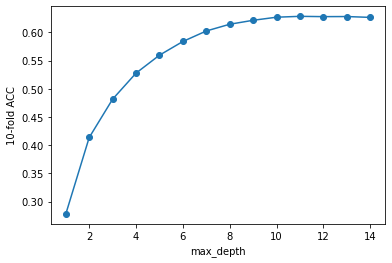

In [438]:
#y repetimos lo anteriormente hecho ahora con dos variables menos
maxDepth = range(1,15)
tuned_parameters = {'max_depth': maxDepth}
#n_estimators el numero de arboles con lo que lo queremos entrenar lo fijamos
grid = GridSearchCV(RandomForestRegressor(random_state=0, n_estimators=200, max_features='sqrt'), param_grid=tuned_parameters,cv=10, verbose=2) 
grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth')
plt.ylabel('10-fold ACC')

plt.show()

In [439]:
maxDepthOptimo = grid.best_params_['max_depth']
bagModel = RandomForestRegressor(max_depth=maxDepthOptimo,n_estimators=200,max_features='sqrt').fit(X_train,y_train)

print("Train: ",bagModel.score(X_train,y_train))
print("Test: ",bagModel.score(X_test,y_test))

Train:  0.7963283722055328
Test:  0.5944624186176717


In [440]:
#cambiamos la profuncidad ya que hay overfitting
maxDepthOptimo = 7#grid.best_params_['max_depth']
bagModel = RandomForestRegressor(max_depth=maxDepthOptimo,n_estimators=200,max_features='sqrt').fit(X_train,y_train)

print("Train: ",bagModel.score(X_train,y_train))
print("Test: ",bagModel.score(X_test,y_test))

Train:  0.6740482349826971
Test:  0.6016292426455878


In [ ]:
#Hemos mejorado tanto los datos de Train como test y tambien el overfitting

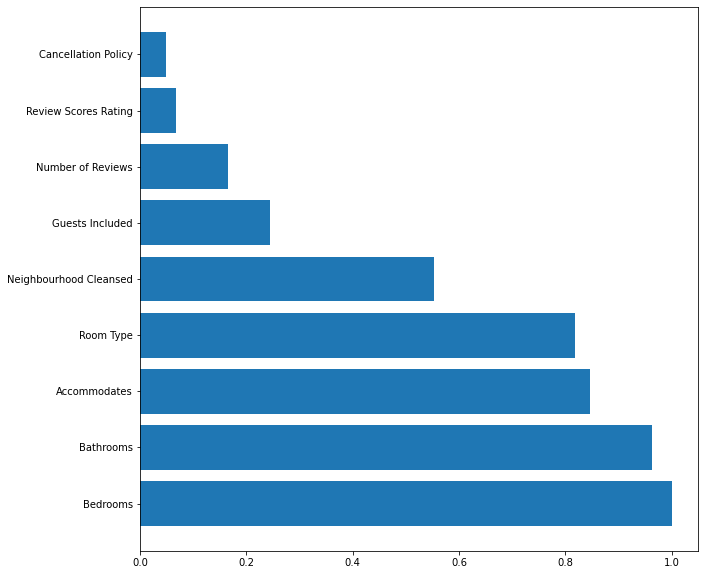

In [441]:
importances = bagModel.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,10))
plt.barh(range(X_train.shape[1]),importances[indices])
plt.yticks(range(X_train.shape[1]),feature_names[indices])
plt.show()

Con los datos finales, hemos encontrado un modelo que generaliza mejor, hemos disminuido el error en test,disminuyendo el overffiting que en algunos otros modelos sí que hemos obtenido. 
Hemos ganado también en simplicidad del algoritmo sin que aumente el error obtenido en el modelo.